# Model New Data

In [1]:
import numpy as np
import pandas as pd
import acquire
import prepare
import model
from env import api_key
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
#validation & tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
cv=KFold(n_splits = 5, random_state=123,shuffle=True)

# Using Data At 10 Minute Timeframe

In [2]:
#Load final_10 csv file
data = pd.read_csv('../master10_csv/final_10.csv', index_col = [0])
data

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,...,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3033.0,2297.0,3978.0,3193.0,4131.0,2971.0,NaN,NaN,NaN,NaN
1,0.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,...,2907.0,2719.0,2691.0,3758.0,4331.0,3662.0,NaN,NaN,NaN,NaN
2,0.0,1.0,2.0,1.0,4.0,5.0,7.0,1.0,3.0,2.0,...,3192.0,3234.0,4260.0,3189.0,4858.0,2538.0,NaN,NaN,NaN,NaN
3,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2921.0,2417.0,4801.0,4457.0,3837.0,2916.0,1.0,NaN,NaN,NaN
4,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,...,3005.0,2671.0,4865.0,3579.0,4496.0,2644.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,0.0,1.0,1.0,2.0,2.0,1.0,4.0,0.0,1.0,2.0,...,3365.0,2670.0,4031.0,3851.0,2589.0,3621.0,NaN,NaN,NaN,NaN
4859,0.0,3.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,...,3119.0,4443.0,3667.0,4158.0,2940.0,3527.0,NaN,NaN,NaN,NaN
4860,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,...,4471.0,2958.0,4988.0,4474.0,2615.0,4185.0,NaN,NaN,NaN,NaN
4861,0.0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,5.0,1.0,...,3347.0,1972.0,5326.0,2685.0,3750.0,3402.0,NaN,NaN,NaN,NaN


In [3]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4862
Data columns (total 196 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    airdragon_team100                 float64
 1    assistsplayer_1                   float64
 2    assistsplayer_10                  float64
 3    assistsplayer_2                   float64
 4    assistsplayer_3                   float64
 5    assistsplayer_4                   float64
 6    assistsplayer_5                   float64
 7    assistsplayer_6                   float64
 8    assistsplayer_7                   float64
 9    assistsplayer_8                   float64
 10   assistsplayer_9                   float64
 11   baron_team100                     float64
 12   chemtechdragon_team100            float64
 13   currentGold_1                     float64
 14   currentGold_10                    float64
 15   currentGold_2                     float64
 16   currentGold_3         

In [4]:
#Now prepare it
train, test = prepare.prepare(data)
train.shape, test.shape

((3890, 265), (973, 265))

Text(0.5, 1.0, 'Feautures Correlating with winningTeam')

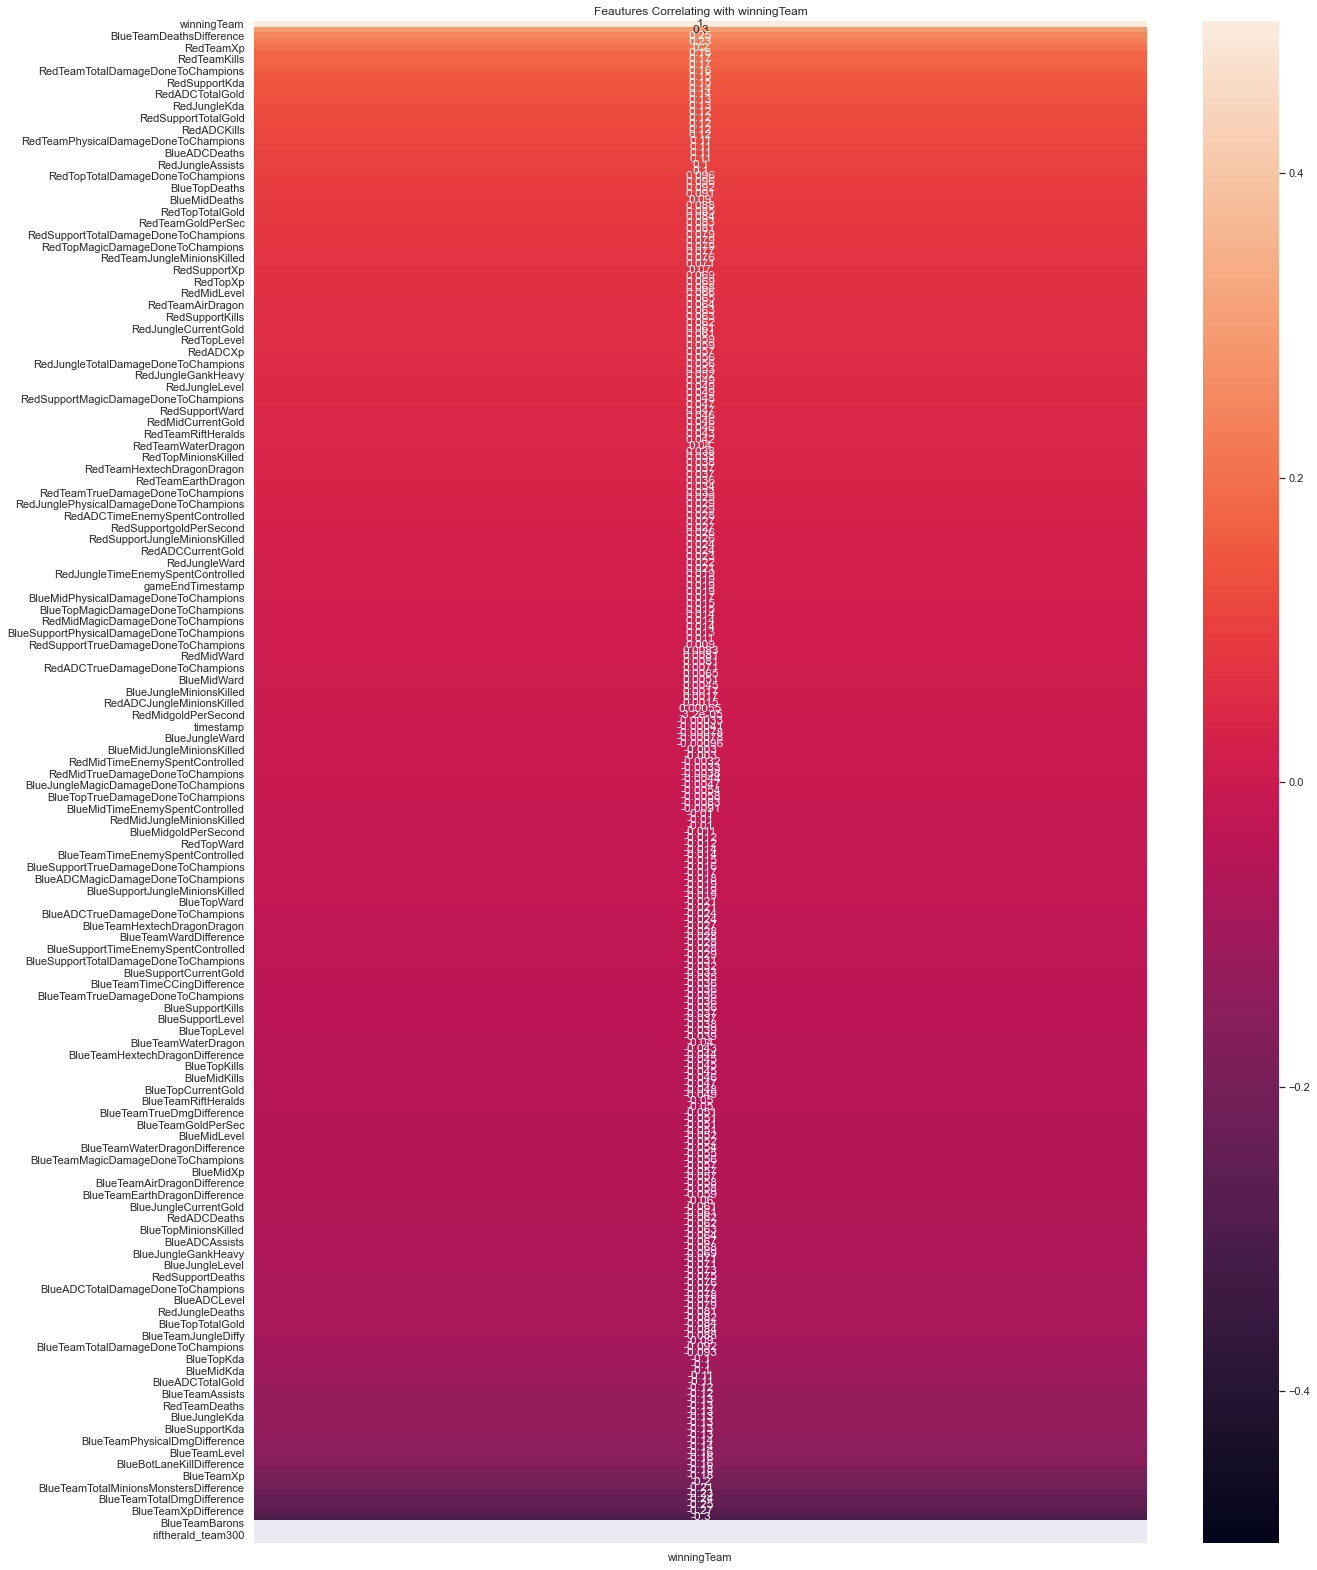

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,28))
heatmap = sns.heatmap(train.corr()[['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-.50, vmax=.50, annot=True)
heatmap.set_title('Feautures Correlating with winningTeam')

In [6]:
#Drop all columns that are categorical. They are not useful
cols_to_drop = train.select_dtypes('object').columns
cols_to_drop

Index(['gameMode', 'gameName', 'gameType', 'gameVersion', 'matchId'], dtype='object')

In [7]:
train = train.drop(columns = cols_to_drop)
test = test.drop(columns = cols_to_drop)

In [8]:
train.shape, test.shape

((3890, 260), (973, 260))

In [20]:
#Now separate it into X and y groups
X_train, y_train = train.drop(columns = ['winningTeam']), train.winningTeam
X_test, y_test = test.drop(columns = ['winningTeam']), train.winningTeam

In [88]:
#x_col = ['BlueTeamXp','BlueTeamBarons','BlueTeamXpDifference','BlueTeamTotalDmgDifference','BlueTeamTotalMinionsMonstersDifference']
#y_col = 'winningTeam'

In [11]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")
train

,BlueTeamAirDragon,BlueTopAssists,RedSupportAssists,BlueJungleAssists,BlueMidAssists,BlueADCAssists,BlueSupportAssists,RedTopAssists,RedJungleAssists,RedMidAssists,RedADCAssists,BlueTeamBarons,BlueTeamChemtechDragon,BlueTopCurrentGold,RedSupportCurrentGold,BlueJungleCurrentGold,BlueMidCurrentGold,BlueADCCurrentGold,BlueSupportCurrentGold,RedTopCurrentGold,RedJungleCurrentGold,RedMidCurrentGold,RedADCCurrentGold,BlueTopDeaths,RedSupportDeaths,BlueJungleDeaths,BlueMidDeaths,BlueADCDeaths,BlueSupportDeaths,RedTopDeaths,RedJungleDeaths,RedMidDeaths,RedADCDeaths,BlueTeamDragons,RedTeamDragons,BlueTeamEarthDragon,RedTeamEarthDragon,BlueTeamFireDragon,RedTeamFireDragon,gameDuration,gameEndTimestamp,gameId,gameStartTimestamp,BlueTopgoldPerSecond,RedSupportgoldPerSecond,BlueJunglegoldPerSecond,BlueMidgoldPerSecond,BlueADCgoldPerSecond,BlueSupportgoldPerSecond,RedTopgoldPerSecond,RedJunglegoldPerSecond,RedMidgoldPerSecond,RedADCgoldPerSecond,BlueTeamHextechDragonDragon,RedTeamHextechDragonDragon,RedTeamInhibsLost,BlueTopJungleMinionsKilled,RedSupportJungleMinionsKilled,BlueJungleJungleMinionsKilled,BlueMidJungleMinionsKilled,BlueADCJungleMinionsKilled,BlueSupportJungleMinionsKilled,RedTopJungleMinionsKilled,RedJungleJungleMinionsKilled,RedMidJungleMinionsKilled,RedADCJungleMinionsKilled,BlueTopKills,RedSupportKills,BlueJungleKills,BlueMidKills,BlueADCKills,BlueSupportKills,RedTopKills,RedJungleKills,RedMidKills,RedADCKills,BlueTopLevel,RedSupportLevel,BlueJungleLevel,BlueMidLevel,BlueADCLevel,BlueSupportLevel,RedTopLevel,RedJungleLevel,RedMidLevel,RedADCLevel,BlueTopMagicDamageDoneToChampions,RedSupportMagicDamageDoneToChampions,BlueJungleMagicDamageDoneToChampions,BlueMidMagicDamageDoneToChampions,BlueADCMagicDamageDoneToChampions,BlueSupportMagicDamageDoneToChampions,RedTopMagicDamageDoneToChampions,RedJungleMagicDamageDoneToChampions,RedMidMagicDamageDoneToChampions,RedADCMagicDamageDoneToChampions,BlueTopMinionsKilled,RedSupportMinionsKilled,BlueJungleMinionsKilled,BlueMidMinionsKilled,BlueADCMinionsKilled,BlueSupportMinionsKilled,RedTopMinionsKilled,RedJungleMinionsKilled,RedMidMinionsKilled,RedADCMinionsKilled,BlueTopPhysicalDamageDoneToChampions,RedSupportPhysicalDamageDoneToChampions,BlueJunglePhysicalDamageDoneToChampions,BlueMidPhysicalDamageDoneToChampions,BlueADCPhysicalDamageDoneToChampions,BlueSupportPhysicalDamageDoneToChampions,RedTopPhysicalDamageDoneToChampions,RedJunglePhysicalDamageDoneToChampions,RedMidPhysicalDamageDoneToChampions,RedADCPhysicalDamageDoneToChampions,queueId,BlueTeamRiftHeralds,riftherald_team300,BlueTopTimeEnemySpentControlled,RedSupportTimeEnemySpentControlled,BlueJungleTimeEnemySpentControlled,BlueMidTimeEnemySpentControlled,BlueADCTimeEnemySpentControlled,BlueSupportTimeEnemySpentControlled,RedTopTimeEnemySpentControlled,RedJungleTimeEnemySpentControlled,RedMidTimeEnemySpentControlled,RedADCTimeEnemySpentControlled,time_cutoff,timestamp,BlueTopTotalDamageDoneToChampions,RedSupportTotalDamageDoneToChampions,BlueJungleTotalDamageDoneToChampions,BlueMidTotalDamageDoneToChampions,BlueADCTotalDamageDoneToChampions,BlueSupportTotalDamageDoneToChampions,RedTopTotalDamageDoneToChampions,RedJungleTotalDamageDoneToChampions,RedMidTotalDamageDoneToChampions,RedADCTotalDamageDoneToChampions,BlueTopTotalGold,RedSupportTotalGold,BlueJungleTotalGold,BlueMidTotalGold,BlueADCTotalGold,BlueSupportTotalGold,RedTopTotalGold,RedJungleTotalGold,RedMidTotalGold,RedADCTotalGold,BlueTeamTowersLost,RedTeamTowersLost,BlueTopTrueDamageDoneToChampions,RedSupportTrueDamageDoneToChampions,BlueJungleTrueDamageDoneToChampions,BlueMidTrueDamageDoneToChampions,BlueADCTrueDamageDoneToChampions,BlueSupportTrueDamageDoneToChampions,RedTopTrueDamageDoneToChampions,RedJungleTrueDamageDoneToChampions,RedMidTrueDamageDoneToChampions,RedADCTrueDamageDoneToChampions,ward_player_0,BlueTopWard,RedSupportWard,BlueJungleWard,BlueMidWard,BlueADCWard,BlueSupportWard,RedTopWard,RedJungleWard,RedMidWard,RedADCWard,BlueTeamWaterDragon,winningTeam,

In [90]:
#splitting our data based on our features
#X_train, y_train = train[x_col], train[y_col]


### Gradient Boosting

In [13]:
#Default Gradient Boosting model without any tuning - base metric
GB_model_default = GradientBoostingClassifier()
GB_model_default.fit(X_train, y_train)
y_pred_GB_default =GB_model_default.predict(X_test)

#Parameter tuning with GridSearchCV 

#######################
### Gradient Boosting
#######################
estimator_GB = GradientBoostingClassifier(max_features='auto', loss='deviance')
parameters_GB = {
    'learning_rate': (0.2, 0.3),
    'n_estimators': (100,130,5),              
    'subsample' : (0.2, 0.3, 0.4),
    'min_samples_split' : (0.1,0.2,0.3),
    'min_samples_leaf' : (3,4,5),
    'max_depth': (2,3,4), 
    
                }
# with GridSearch
grid_search_GB = GridSearchCV(
    estimator=estimator_GB,
    param_grid=parameters_GB,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
#class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
#                                               n_estimators=100, subsample=1.0, criterion='friedman_mse', 
#                                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#                                               max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
#                                               init=None, random_state=None, max_features=None, verbose=0, 
#                                               max_leaf_nodes=None, warm_start=False, presort='deprecated', 
#                                               validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, 
#                                               ccp_alpha=0.0

GB_1=grid_search_GB.fit(X_train, y_train)
y_pred_GB1 =GB_1.predict(X_test)

print(grid_search_GB.best_params_ ) 
print(grid_search_GB.best_score_ ) 

{'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 0.2, 'n_estimators': 130, 'subsample': 0.4}

{'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 0.1, 'n_estimators': 5, 'subsample': 0.4}
0.6354755784061696


{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 0.2,
 'n_estimators': 130,
 'subsample': 0.4}

### Bagging Classifier

## Catboost

In [22]:
cat_params = {"learning_rate":[0.005],
              "depth":[6,8]}

In [23]:
cat = CatBoostClassifier()

In [24]:
cat_grid = GridSearchCV(cat,cat_params,cv=cv)

In [25]:
cat_grid.fit(X_train,y_train)

0:	learn: 0.6925969	total: 91.9ms	remaining: 1m 31s
1:	learn: 0.6920066	total: 102ms	remaining: 50.9s
2:	learn: 0.6913863	total: 110ms	remaining: 36.7s
3:	learn: 0.6908671	total: 118ms	remaining: 29.5s
4:	learn: 0.6902224	total: 126ms	remaining: 25.1s
5:	learn: 0.6895259	total: 134ms	remaining: 22.2s
6:	learn: 0.6890635	total: 142ms	remaining: 20.1s
7:	learn: 0.6885301	total: 149ms	remaining: 18.5s
8:	learn: 0.6881165	total: 157ms	remaining: 17.3s
9:	learn: 0.6876525	total: 165ms	remaining: 16.3s
10:	learn: 0.6871073	total: 172ms	remaining: 15.5s
11:	learn: 0.6865295	total: 180ms	remaining: 14.9s
12:	learn: 0.6860550	total: 188ms	remaining: 14.3s
13:	learn: 0.6856076	total: 196ms	remaining: 13.8s
14:	learn: 0.6849366	total: 204ms	remaining: 13.4s
15:	learn: 0.6843232	total: 212ms	remaining: 13s
16:	learn: 0.6838905	total: 219ms	remaining: 12.7s
17:	learn: 0.6835434	total: 227ms	remaining: 12.4s
18:	learn: 0.6829388	total: 235ms	remaining: 12.1s
19:	learn: 0.6823222	total: 242ms	remaini

176:	learn: 0.6321822	total: 1.49s	remaining: 6.92s
177:	learn: 0.6319280	total: 1.5s	remaining: 6.91s
178:	learn: 0.6316902	total: 1.5s	remaining: 6.91s
179:	learn: 0.6314076	total: 1.51s	remaining: 6.9s
180:	learn: 0.6311387	total: 1.52s	remaining: 6.89s
181:	learn: 0.6309729	total: 1.53s	remaining: 6.88s
182:	learn: 0.6307430	total: 1.54s	remaining: 6.86s
183:	learn: 0.6305112	total: 1.54s	remaining: 6.85s
184:	learn: 0.6303291	total: 1.55s	remaining: 6.84s
185:	learn: 0.6301115	total: 1.56s	remaining: 6.82s
186:	learn: 0.6299650	total: 1.57s	remaining: 6.81s
187:	learn: 0.6296697	total: 1.57s	remaining: 6.8s
188:	learn: 0.6293588	total: 1.58s	remaining: 6.79s
189:	learn: 0.6291706	total: 1.59s	remaining: 6.77s
190:	learn: 0.6289253	total: 1.6s	remaining: 6.76s
191:	learn: 0.6287799	total: 1.6s	remaining: 6.75s
192:	learn: 0.6285666	total: 1.61s	remaining: 6.73s
193:	learn: 0.6283847	total: 1.62s	remaining: 6.72s
194:	learn: 0.6281571	total: 1.62s	remaining: 6.71s
195:	learn: 0.6280

352:	learn: 0.5996488	total: 2.87s	remaining: 5.25s
353:	learn: 0.5994746	total: 2.87s	remaining: 5.25s
354:	learn: 0.5993928	total: 2.88s	remaining: 5.24s
355:	learn: 0.5992123	total: 2.9s	remaining: 5.24s
356:	learn: 0.5990955	total: 2.9s	remaining: 5.23s
357:	learn: 0.5989170	total: 2.91s	remaining: 5.22s
358:	learn: 0.5988122	total: 2.92s	remaining: 5.21s
359:	learn: 0.5986598	total: 2.93s	remaining: 5.21s
360:	learn: 0.5985292	total: 2.94s	remaining: 5.2s
361:	learn: 0.5983825	total: 2.94s	remaining: 5.19s
362:	learn: 0.5982573	total: 2.95s	remaining: 5.18s
363:	learn: 0.5980678	total: 2.96s	remaining: 5.17s
364:	learn: 0.5979289	total: 2.97s	remaining: 5.17s
365:	learn: 0.5977718	total: 2.98s	remaining: 5.16s
366:	learn: 0.5976291	total: 2.98s	remaining: 5.15s
367:	learn: 0.5975070	total: 2.99s	remaining: 5.14s
368:	learn: 0.5973208	total: 3s	remaining: 5.13s
369:	learn: 0.5971368	total: 3.01s	remaining: 5.13s
370:	learn: 0.5969863	total: 3.02s	remaining: 5.12s
371:	learn: 0.5968

529:	learn: 0.5761158	total: 4.26s	remaining: 3.78s
530:	learn: 0.5760370	total: 4.27s	remaining: 3.77s
531:	learn: 0.5759442	total: 4.28s	remaining: 3.77s
532:	learn: 0.5758078	total: 4.29s	remaining: 3.76s
533:	learn: 0.5756971	total: 4.3s	remaining: 3.75s
534:	learn: 0.5755915	total: 4.31s	remaining: 3.74s
535:	learn: 0.5754607	total: 4.31s	remaining: 3.73s
536:	learn: 0.5752813	total: 4.32s	remaining: 3.73s
537:	learn: 0.5751933	total: 4.33s	remaining: 3.72s
538:	learn: 0.5750464	total: 4.34s	remaining: 3.71s
539:	learn: 0.5749541	total: 4.34s	remaining: 3.7s
540:	learn: 0.5748573	total: 4.35s	remaining: 3.69s
541:	learn: 0.5746535	total: 4.36s	remaining: 3.69s
542:	learn: 0.5745662	total: 4.37s	remaining: 3.68s
543:	learn: 0.5744976	total: 4.38s	remaining: 3.67s
544:	learn: 0.5743994	total: 4.39s	remaining: 3.66s
545:	learn: 0.5743092	total: 4.39s	remaining: 3.65s
546:	learn: 0.5741572	total: 4.4s	remaining: 3.65s
547:	learn: 0.5740358	total: 4.41s	remaining: 3.64s
548:	learn: 0.5

695:	learn: 0.5565113	total: 5.64s	remaining: 2.46s
696:	learn: 0.5564081	total: 5.65s	remaining: 2.46s
697:	learn: 0.5562948	total: 5.66s	remaining: 2.45s
698:	learn: 0.5562240	total: 5.67s	remaining: 2.44s
699:	learn: 0.5561419	total: 5.68s	remaining: 2.43s
700:	learn: 0.5560234	total: 5.69s	remaining: 2.42s
701:	learn: 0.5559410	total: 5.7s	remaining: 2.42s
702:	learn: 0.5558054	total: 5.7s	remaining: 2.41s
703:	learn: 0.5556856	total: 5.71s	remaining: 2.4s
704:	learn: 0.5555607	total: 5.72s	remaining: 2.39s
705:	learn: 0.5554664	total: 5.73s	remaining: 2.38s
706:	learn: 0.5553624	total: 5.74s	remaining: 2.38s
707:	learn: 0.5552400	total: 5.75s	remaining: 2.37s
708:	learn: 0.5550973	total: 5.75s	remaining: 2.36s
709:	learn: 0.5549729	total: 5.76s	remaining: 2.35s
710:	learn: 0.5548648	total: 5.77s	remaining: 2.35s
711:	learn: 0.5547270	total: 5.78s	remaining: 2.34s
712:	learn: 0.5546327	total: 5.79s	remaining: 2.33s
713:	learn: 0.5545445	total: 5.8s	remaining: 2.32s
714:	learn: 0.55

867:	learn: 0.5388266	total: 7.04s	remaining: 1.07s
868:	learn: 0.5387371	total: 7.05s	remaining: 1.06s
869:	learn: 0.5386401	total: 7.06s	remaining: 1.05s
870:	learn: 0.5385231	total: 7.07s	remaining: 1.05s
871:	learn: 0.5384190	total: 7.07s	remaining: 1.04s
872:	learn: 0.5383385	total: 7.08s	remaining: 1.03s
873:	learn: 0.5382342	total: 7.09s	remaining: 1.02s
874:	learn: 0.5381962	total: 7.1s	remaining: 1.01s
875:	learn: 0.5380426	total: 7.1s	remaining: 1s
876:	learn: 0.5379474	total: 7.11s	remaining: 998ms
877:	learn: 0.5378573	total: 7.12s	remaining: 989ms
878:	learn: 0.5377513	total: 7.13s	remaining: 981ms
879:	learn: 0.5376569	total: 7.13s	remaining: 973ms
880:	learn: 0.5375451	total: 7.14s	remaining: 965ms
881:	learn: 0.5374288	total: 7.15s	remaining: 957ms
882:	learn: 0.5373468	total: 7.16s	remaining: 949ms
883:	learn: 0.5372236	total: 7.17s	remaining: 941ms
884:	learn: 0.5371191	total: 7.17s	remaining: 932ms
885:	learn: 0.5370089	total: 7.18s	remaining: 924ms
886:	learn: 0.536

37:	learn: 0.6760450	total: 301ms	remaining: 7.63s
38:	learn: 0.6755875	total: 312ms	remaining: 7.69s
39:	learn: 0.6751911	total: 321ms	remaining: 7.71s
40:	learn: 0.6747887	total: 330ms	remaining: 7.71s
41:	learn: 0.6743004	total: 338ms	remaining: 7.7s
42:	learn: 0.6738701	total: 345ms	remaining: 7.68s
43:	learn: 0.6734894	total: 354ms	remaining: 7.7s
44:	learn: 0.6730502	total: 363ms	remaining: 7.71s
45:	learn: 0.6725425	total: 371ms	remaining: 7.7s
46:	learn: 0.6722325	total: 380ms	remaining: 7.7s
47:	learn: 0.6718178	total: 388ms	remaining: 7.7s
48:	learn: 0.6713081	total: 396ms	remaining: 7.69s
49:	learn: 0.6708844	total: 405ms	remaining: 7.7s
50:	learn: 0.6704426	total: 413ms	remaining: 7.69s
51:	learn: 0.6698605	total: 422ms	remaining: 7.69s
52:	learn: 0.6695012	total: 431ms	remaining: 7.7s
53:	learn: 0.6691720	total: 439ms	remaining: 7.7s
54:	learn: 0.6688713	total: 448ms	remaining: 7.7s
55:	learn: 0.6684617	total: 459ms	remaining: 7.74s
56:	learn: 0.6680306	total: 468ms	remain

203:	learn: 0.6274101	total: 1.7s	remaining: 6.65s
204:	learn: 0.6272743	total: 1.71s	remaining: 6.65s
205:	learn: 0.6271018	total: 1.73s	remaining: 6.65s
206:	learn: 0.6268446	total: 1.73s	remaining: 6.64s
207:	learn: 0.6266592	total: 1.74s	remaining: 6.63s
208:	learn: 0.6264485	total: 1.75s	remaining: 6.62s
209:	learn: 0.6262199	total: 1.76s	remaining: 6.62s
210:	learn: 0.6260272	total: 1.77s	remaining: 6.6s
211:	learn: 0.6258281	total: 1.77s	remaining: 6.6s
212:	learn: 0.6255201	total: 1.78s	remaining: 6.59s
213:	learn: 0.6252396	total: 1.79s	remaining: 6.58s
214:	learn: 0.6249365	total: 1.8s	remaining: 6.57s
215:	learn: 0.6247945	total: 1.81s	remaining: 6.57s
216:	learn: 0.6246742	total: 1.82s	remaining: 6.56s
217:	learn: 0.6243739	total: 1.82s	remaining: 6.55s
218:	learn: 0.6241676	total: 1.83s	remaining: 6.54s
219:	learn: 0.6239241	total: 1.84s	remaining: 6.53s
220:	learn: 0.6236528	total: 1.85s	remaining: 6.52s
221:	learn: 0.6234711	total: 1.86s	remaining: 6.51s
222:	learn: 0.62

369:	learn: 0.5976504	total: 3.1s	remaining: 5.28s
370:	learn: 0.5975634	total: 3.11s	remaining: 5.27s
371:	learn: 0.5973748	total: 3.12s	remaining: 5.26s
372:	learn: 0.5972237	total: 3.13s	remaining: 5.26s
373:	learn: 0.5970597	total: 3.14s	remaining: 5.25s
374:	learn: 0.5968828	total: 3.15s	remaining: 5.25s
375:	learn: 0.5967421	total: 3.16s	remaining: 5.25s
376:	learn: 0.5965847	total: 3.17s	remaining: 5.24s
377:	learn: 0.5964451	total: 3.18s	remaining: 5.23s
378:	learn: 0.5962960	total: 3.19s	remaining: 5.23s
379:	learn: 0.5961948	total: 3.2s	remaining: 5.22s
380:	learn: 0.5959954	total: 3.21s	remaining: 5.22s
381:	learn: 0.5958437	total: 3.22s	remaining: 5.21s
382:	learn: 0.5956448	total: 3.23s	remaining: 5.21s
383:	learn: 0.5954326	total: 3.24s	remaining: 5.2s
384:	learn: 0.5952607	total: 3.25s	remaining: 5.19s
385:	learn: 0.5950907	total: 3.26s	remaining: 5.18s
386:	learn: 0.5949510	total: 3.27s	remaining: 5.17s
387:	learn: 0.5947609	total: 3.27s	remaining: 5.17s
388:	learn: 0.5

532:	learn: 0.5758020	total: 4.49s	remaining: 3.94s
533:	learn: 0.5757202	total: 4.5s	remaining: 3.93s
534:	learn: 0.5756034	total: 4.51s	remaining: 3.92s
535:	learn: 0.5754952	total: 4.52s	remaining: 3.91s
536:	learn: 0.5753340	total: 4.53s	remaining: 3.9s
537:	learn: 0.5752236	total: 4.53s	remaining: 3.89s
538:	learn: 0.5751335	total: 4.54s	remaining: 3.88s
539:	learn: 0.5750324	total: 4.55s	remaining: 3.88s
540:	learn: 0.5749519	total: 4.56s	remaining: 3.87s
541:	learn: 0.5748327	total: 4.56s	remaining: 3.86s
542:	learn: 0.5747186	total: 4.57s	remaining: 3.85s
543:	learn: 0.5746333	total: 4.58s	remaining: 3.84s
544:	learn: 0.5745125	total: 4.59s	remaining: 3.83s
545:	learn: 0.5744542	total: 4.59s	remaining: 3.82s
546:	learn: 0.5743755	total: 4.6s	remaining: 3.81s
547:	learn: 0.5742923	total: 4.61s	remaining: 3.8s
548:	learn: 0.5741550	total: 4.62s	remaining: 3.79s
549:	learn: 0.5740406	total: 4.62s	remaining: 3.78s
550:	learn: 0.5738912	total: 4.63s	remaining: 3.77s
551:	learn: 0.57

698:	learn: 0.5566859	total: 5.87s	remaining: 2.53s
699:	learn: 0.5565742	total: 5.88s	remaining: 2.52s
700:	learn: 0.5564209	total: 5.89s	remaining: 2.51s
701:	learn: 0.5562568	total: 5.9s	remaining: 2.5s
702:	learn: 0.5561400	total: 5.91s	remaining: 2.5s
703:	learn: 0.5560575	total: 5.92s	remaining: 2.49s
704:	learn: 0.5559085	total: 5.93s	remaining: 2.48s
705:	learn: 0.5557856	total: 5.93s	remaining: 2.47s
706:	learn: 0.5557002	total: 5.94s	remaining: 2.46s
707:	learn: 0.5555896	total: 5.95s	remaining: 2.46s
708:	learn: 0.5555196	total: 5.96s	remaining: 2.45s
709:	learn: 0.5554164	total: 5.97s	remaining: 2.44s
710:	learn: 0.5553153	total: 5.98s	remaining: 2.43s
711:	learn: 0.5552146	total: 5.99s	remaining: 2.42s
712:	learn: 0.5550851	total: 5.99s	remaining: 2.41s
713:	learn: 0.5549646	total: 6s	remaining: 2.4s
714:	learn: 0.5547722	total: 6.01s	remaining: 2.4s
715:	learn: 0.5546780	total: 6.02s	remaining: 2.39s
716:	learn: 0.5546127	total: 6.03s	remaining: 2.38s
717:	learn: 0.554485

860:	learn: 0.5396662	total: 7.28s	remaining: 1.17s
861:	learn: 0.5395301	total: 7.29s	remaining: 1.17s
862:	learn: 0.5394617	total: 7.3s	remaining: 1.16s
863:	learn: 0.5393468	total: 7.31s	remaining: 1.15s
864:	learn: 0.5392659	total: 7.32s	remaining: 1.14s
865:	learn: 0.5391723	total: 7.32s	remaining: 1.13s
866:	learn: 0.5390752	total: 7.33s	remaining: 1.13s
867:	learn: 0.5389426	total: 7.34s	remaining: 1.12s
868:	learn: 0.5388790	total: 7.35s	remaining: 1.11s
869:	learn: 0.5388135	total: 7.36s	remaining: 1.1s
870:	learn: 0.5387243	total: 7.37s	remaining: 1.09s
871:	learn: 0.5385941	total: 7.38s	remaining: 1.08s
872:	learn: 0.5385248	total: 7.39s	remaining: 1.07s
873:	learn: 0.5384393	total: 7.39s	remaining: 1.07s
874:	learn: 0.5383210	total: 7.4s	remaining: 1.06s
875:	learn: 0.5381442	total: 7.41s	remaining: 1.05s
876:	learn: 0.5380131	total: 7.42s	remaining: 1.04s
877:	learn: 0.5379342	total: 7.43s	remaining: 1.03s
878:	learn: 0.5378188	total: 7.44s	remaining: 1.02s
879:	learn: 0.5

34:	learn: 0.6755081	total: 321ms	remaining: 8.86s
35:	learn: 0.6750104	total: 331ms	remaining: 8.86s
36:	learn: 0.6745773	total: 340ms	remaining: 8.85s
37:	learn: 0.6741080	total: 349ms	remaining: 8.82s
38:	learn: 0.6736161	total: 356ms	remaining: 8.78s
39:	learn: 0.6732193	total: 364ms	remaining: 8.74s
40:	learn: 0.6728097	total: 372ms	remaining: 8.71s
41:	learn: 0.6723187	total: 380ms	remaining: 8.66s
42:	learn: 0.6719771	total: 387ms	remaining: 8.62s
43:	learn: 0.6716312	total: 395ms	remaining: 8.57s
44:	learn: 0.6712108	total: 402ms	remaining: 8.54s
45:	learn: 0.6708197	total: 410ms	remaining: 8.5s
46:	learn: 0.6704927	total: 417ms	remaining: 8.45s
47:	learn: 0.6700769	total: 424ms	remaining: 8.42s
48:	learn: 0.6696976	total: 434ms	remaining: 8.43s
49:	learn: 0.6692435	total: 442ms	remaining: 8.4s
50:	learn: 0.6687684	total: 451ms	remaining: 8.4s
51:	learn: 0.6683869	total: 459ms	remaining: 8.37s
52:	learn: 0.6679630	total: 468ms	remaining: 8.36s
53:	learn: 0.6676214	total: 476ms	

200:	learn: 0.6235809	total: 1.71s	remaining: 6.79s
201:	learn: 0.6232780	total: 1.72s	remaining: 6.78s
202:	learn: 0.6230340	total: 1.73s	remaining: 6.78s
203:	learn: 0.6228719	total: 1.74s	remaining: 6.78s
204:	learn: 0.6227189	total: 1.75s	remaining: 6.77s
205:	learn: 0.6224603	total: 1.75s	remaining: 6.76s
206:	learn: 0.6222085	total: 1.76s	remaining: 6.75s
207:	learn: 0.6219779	total: 1.77s	remaining: 6.74s
208:	learn: 0.6218002	total: 1.78s	remaining: 6.74s
209:	learn: 0.6215933	total: 1.79s	remaining: 6.73s
210:	learn: 0.6213462	total: 1.8s	remaining: 6.72s
211:	learn: 0.6211716	total: 1.81s	remaining: 6.71s
212:	learn: 0.6209808	total: 1.81s	remaining: 6.71s
213:	learn: 0.6207868	total: 1.82s	remaining: 6.7s
214:	learn: 0.6206306	total: 1.83s	remaining: 6.7s
215:	learn: 0.6205013	total: 1.84s	remaining: 6.68s
216:	learn: 0.6203139	total: 1.85s	remaining: 6.68s
217:	learn: 0.6201171	total: 1.86s	remaining: 6.67s
218:	learn: 0.6199366	total: 1.87s	remaining: 6.66s
219:	learn: 0.6

371:	learn: 0.5917175	total: 3.1s	remaining: 5.24s
372:	learn: 0.5915865	total: 3.11s	remaining: 5.23s
373:	learn: 0.5914034	total: 3.12s	remaining: 5.22s
374:	learn: 0.5912396	total: 3.13s	remaining: 5.21s
375:	learn: 0.5911012	total: 3.14s	remaining: 5.21s
376:	learn: 0.5909756	total: 3.14s	remaining: 5.2s
377:	learn: 0.5908580	total: 3.15s	remaining: 5.19s
378:	learn: 0.5907265	total: 3.16s	remaining: 5.18s
379:	learn: 0.5906176	total: 3.17s	remaining: 5.17s
380:	learn: 0.5904160	total: 3.17s	remaining: 5.16s
381:	learn: 0.5902806	total: 3.18s	remaining: 5.15s
382:	learn: 0.5901086	total: 3.19s	remaining: 5.14s
383:	learn: 0.5899707	total: 3.2s	remaining: 5.13s
384:	learn: 0.5898554	total: 3.2s	remaining: 5.12s
385:	learn: 0.5896614	total: 3.21s	remaining: 5.11s
386:	learn: 0.5895002	total: 3.22s	remaining: 5.1s
387:	learn: 0.5893594	total: 3.23s	remaining: 5.09s
388:	learn: 0.5891852	total: 3.23s	remaining: 5.08s
389:	learn: 0.5890550	total: 3.24s	remaining: 5.07s
390:	learn: 0.588

546:	learn: 0.5675012	total: 4.49s	remaining: 3.72s
547:	learn: 0.5674048	total: 4.5s	remaining: 3.71s
548:	learn: 0.5672684	total: 4.51s	remaining: 3.71s
549:	learn: 0.5671733	total: 4.52s	remaining: 3.7s
550:	learn: 0.5670491	total: 4.53s	remaining: 3.69s
551:	learn: 0.5669404	total: 4.54s	remaining: 3.68s
552:	learn: 0.5668173	total: 4.55s	remaining: 3.67s
553:	learn: 0.5666936	total: 4.55s	remaining: 3.67s
554:	learn: 0.5666036	total: 4.56s	remaining: 3.66s
555:	learn: 0.5664529	total: 4.57s	remaining: 3.65s
556:	learn: 0.5662999	total: 4.58s	remaining: 3.64s
557:	learn: 0.5661547	total: 4.59s	remaining: 3.63s
558:	learn: 0.5660359	total: 4.59s	remaining: 3.63s
559:	learn: 0.5659211	total: 4.6s	remaining: 3.62s
560:	learn: 0.5657759	total: 4.61s	remaining: 3.61s
561:	learn: 0.5656714	total: 4.62s	remaining: 3.6s
562:	learn: 0.5655328	total: 4.63s	remaining: 3.59s
563:	learn: 0.5654123	total: 4.64s	remaining: 3.58s
564:	learn: 0.5653182	total: 4.64s	remaining: 3.58s
565:	learn: 0.56

709:	learn: 0.5480616	total: 5.89s	remaining: 2.4s
710:	learn: 0.5479439	total: 5.9s	remaining: 2.4s
711:	learn: 0.5478207	total: 5.91s	remaining: 2.39s
712:	learn: 0.5476915	total: 5.92s	remaining: 2.38s
713:	learn: 0.5476245	total: 5.92s	remaining: 2.37s
714:	learn: 0.5475272	total: 5.93s	remaining: 2.37s
715:	learn: 0.5474236	total: 5.94s	remaining: 2.36s
716:	learn: 0.5473236	total: 5.95s	remaining: 2.35s
717:	learn: 0.5472178	total: 5.96s	remaining: 2.34s
718:	learn: 0.5471136	total: 5.97s	remaining: 2.33s
719:	learn: 0.5470173	total: 5.98s	remaining: 2.32s
720:	learn: 0.5468424	total: 5.99s	remaining: 2.32s
721:	learn: 0.5466963	total: 5.99s	remaining: 2.31s
722:	learn: 0.5466187	total: 6s	remaining: 2.3s
723:	learn: 0.5465144	total: 6.01s	remaining: 2.29s
724:	learn: 0.5463521	total: 6.02s	remaining: 2.28s
725:	learn: 0.5462894	total: 6.03s	remaining: 2.27s
726:	learn: 0.5462058	total: 6.04s	remaining: 2.27s
727:	learn: 0.5460597	total: 6.05s	remaining: 2.26s
728:	learn: 0.54595

889:	learn: 0.5293039	total: 7.48s	remaining: 924ms
890:	learn: 0.5292077	total: 7.49s	remaining: 916ms
891:	learn: 0.5291482	total: 7.5s	remaining: 908ms
892:	learn: 0.5290179	total: 7.5s	remaining: 899ms
893:	learn: 0.5289340	total: 7.51s	remaining: 891ms
894:	learn: 0.5288142	total: 7.52s	remaining: 883ms
895:	learn: 0.5287123	total: 7.53s	remaining: 874ms
896:	learn: 0.5286026	total: 7.54s	remaining: 866ms
897:	learn: 0.5285190	total: 7.55s	remaining: 857ms
898:	learn: 0.5284206	total: 7.56s	remaining: 849ms
899:	learn: 0.5283329	total: 7.56s	remaining: 841ms
900:	learn: 0.5282912	total: 7.57s	remaining: 832ms
901:	learn: 0.5281845	total: 7.58s	remaining: 824ms
902:	learn: 0.5281068	total: 7.59s	remaining: 815ms
903:	learn: 0.5279904	total: 7.6s	remaining: 807ms
904:	learn: 0.5278751	total: 7.61s	remaining: 799ms
905:	learn: 0.5278356	total: 7.62s	remaining: 790ms
906:	learn: 0.5277592	total: 7.62s	remaining: 782ms
907:	learn: 0.5276269	total: 7.63s	remaining: 773ms
908:	learn: 0.5

71:	learn: 0.6601964	total: 611ms	remaining: 7.88s
72:	learn: 0.6598707	total: 621ms	remaining: 7.88s
73:	learn: 0.6594219	total: 630ms	remaining: 7.88s
74:	learn: 0.6590629	total: 638ms	remaining: 7.87s
75:	learn: 0.6587226	total: 646ms	remaining: 7.85s
76:	learn: 0.6583247	total: 654ms	remaining: 7.83s
77:	learn: 0.6579449	total: 662ms	remaining: 7.82s
78:	learn: 0.6576313	total: 670ms	remaining: 7.81s
79:	learn: 0.6571662	total: 679ms	remaining: 7.8s
80:	learn: 0.6568726	total: 687ms	remaining: 7.79s
81:	learn: 0.6564916	total: 695ms	remaining: 7.78s
82:	learn: 0.6561745	total: 704ms	remaining: 7.78s
83:	learn: 0.6557011	total: 713ms	remaining: 7.78s
84:	learn: 0.6554083	total: 723ms	remaining: 7.78s
85:	learn: 0.6550177	total: 732ms	remaining: 7.78s
86:	learn: 0.6546340	total: 741ms	remaining: 7.77s
87:	learn: 0.6543476	total: 749ms	remaining: 7.76s
88:	learn: 0.6539041	total: 758ms	remaining: 7.76s
89:	learn: 0.6533568	total: 767ms	remaining: 7.75s
90:	learn: 0.6530155	total: 775m

234:	learn: 0.6151841	total: 2s	remaining: 6.5s
235:	learn: 0.6149532	total: 2.01s	remaining: 6.49s
236:	learn: 0.6147754	total: 2.01s	remaining: 6.49s
237:	learn: 0.6145169	total: 2.02s	remaining: 6.48s
238:	learn: 0.6143626	total: 2.03s	remaining: 6.46s
239:	learn: 0.6140936	total: 2.04s	remaining: 6.45s
240:	learn: 0.6139514	total: 2.04s	remaining: 6.44s
241:	learn: 0.6137844	total: 2.05s	remaining: 6.43s
242:	learn: 0.6135769	total: 2.06s	remaining: 6.42s
243:	learn: 0.6133602	total: 2.07s	remaining: 6.41s
244:	learn: 0.6131621	total: 2.08s	remaining: 6.4s
245:	learn: 0.6129424	total: 2.08s	remaining: 6.39s
246:	learn: 0.6127802	total: 2.09s	remaining: 6.38s
247:	learn: 0.6126185	total: 2.1s	remaining: 6.36s
248:	learn: 0.6124589	total: 2.11s	remaining: 6.35s
249:	learn: 0.6122281	total: 2.11s	remaining: 6.34s
250:	learn: 0.6120427	total: 2.12s	remaining: 6.33s
251:	learn: 0.6118431	total: 2.13s	remaining: 6.32s
252:	learn: 0.6116810	total: 2.13s	remaining: 6.3s
253:	learn: 0.61147

406:	learn: 0.5862578	total: 3.39s	remaining: 4.94s
407:	learn: 0.5861085	total: 3.4s	remaining: 4.93s
408:	learn: 0.5859601	total: 3.41s	remaining: 4.92s
409:	learn: 0.5858358	total: 3.42s	remaining: 4.92s
410:	learn: 0.5856648	total: 3.42s	remaining: 4.91s
411:	learn: 0.5854476	total: 3.43s	remaining: 4.9s
412:	learn: 0.5853243	total: 3.44s	remaining: 4.89s
413:	learn: 0.5851893	total: 3.45s	remaining: 4.88s
414:	learn: 0.5850563	total: 3.46s	remaining: 4.87s
415:	learn: 0.5849180	total: 3.46s	remaining: 4.87s
416:	learn: 0.5847821	total: 3.47s	remaining: 4.86s
417:	learn: 0.5845969	total: 3.48s	remaining: 4.85s
418:	learn: 0.5845141	total: 3.49s	remaining: 4.84s
419:	learn: 0.5843404	total: 3.5s	remaining: 4.83s
420:	learn: 0.5842267	total: 3.51s	remaining: 4.83s
421:	learn: 0.5841382	total: 3.52s	remaining: 4.82s
422:	learn: 0.5840042	total: 3.53s	remaining: 4.81s
423:	learn: 0.5838760	total: 3.54s	remaining: 4.8s
424:	learn: 0.5837683	total: 3.54s	remaining: 4.79s
425:	learn: 0.58

574:	learn: 0.5644259	total: 4.79s	remaining: 3.54s
575:	learn: 0.5643342	total: 4.8s	remaining: 3.54s
576:	learn: 0.5642062	total: 4.81s	remaining: 3.53s
577:	learn: 0.5640754	total: 4.82s	remaining: 3.52s
578:	learn: 0.5639381	total: 4.83s	remaining: 3.51s
579:	learn: 0.5638050	total: 4.84s	remaining: 3.5s
580:	learn: 0.5637018	total: 4.85s	remaining: 3.5s
581:	learn: 0.5635646	total: 4.86s	remaining: 3.49s
582:	learn: 0.5634020	total: 4.87s	remaining: 3.48s
583:	learn: 0.5632893	total: 4.87s	remaining: 3.47s
584:	learn: 0.5631754	total: 4.88s	remaining: 3.46s
585:	learn: 0.5630705	total: 4.89s	remaining: 3.46s
586:	learn: 0.5629368	total: 4.9s	remaining: 3.45s
587:	learn: 0.5628231	total: 4.91s	remaining: 3.44s
588:	learn: 0.5626634	total: 4.92s	remaining: 3.43s
589:	learn: 0.5625849	total: 4.93s	remaining: 3.42s
590:	learn: 0.5624909	total: 4.93s	remaining: 3.41s
591:	learn: 0.5623844	total: 4.94s	remaining: 3.41s
592:	learn: 0.5622783	total: 4.95s	remaining: 3.4s
593:	learn: 0.562

733:	learn: 0.5459440	total: 6.18s	remaining: 2.24s
734:	learn: 0.5458969	total: 6.19s	remaining: 2.23s
735:	learn: 0.5458140	total: 6.2s	remaining: 2.23s
736:	learn: 0.5457154	total: 6.21s	remaining: 2.22s
737:	learn: 0.5456000	total: 6.22s	remaining: 2.21s
738:	learn: 0.5454408	total: 6.23s	remaining: 2.2s
739:	learn: 0.5453608	total: 6.24s	remaining: 2.19s
740:	learn: 0.5452873	total: 6.24s	remaining: 2.18s
741:	learn: 0.5451719	total: 6.25s	remaining: 2.17s
742:	learn: 0.5450719	total: 6.26s	remaining: 2.17s
743:	learn: 0.5449566	total: 6.27s	remaining: 2.16s
744:	learn: 0.5448233	total: 6.28s	remaining: 2.15s
745:	learn: 0.5447024	total: 6.29s	remaining: 2.14s
746:	learn: 0.5446087	total: 6.3s	remaining: 2.13s
747:	learn: 0.5445388	total: 6.31s	remaining: 2.12s
748:	learn: 0.5444314	total: 6.32s	remaining: 2.12s
749:	learn: 0.5443077	total: 6.32s	remaining: 2.11s
750:	learn: 0.5441861	total: 6.33s	remaining: 2.1s
751:	learn: 0.5440952	total: 6.34s	remaining: 2.09s
752:	learn: 0.54

896:	learn: 0.5283615	total: 7.57s	remaining: 869ms
897:	learn: 0.5282942	total: 7.58s	remaining: 861ms
898:	learn: 0.5282331	total: 7.58s	remaining: 852ms
899:	learn: 0.5281245	total: 7.59s	remaining: 844ms
900:	learn: 0.5280242	total: 7.6s	remaining: 836ms
901:	learn: 0.5279304	total: 7.61s	remaining: 827ms
902:	learn: 0.5278571	total: 7.62s	remaining: 819ms
903:	learn: 0.5277623	total: 7.63s	remaining: 810ms
904:	learn: 0.5276572	total: 7.64s	remaining: 802ms
905:	learn: 0.5275661	total: 7.65s	remaining: 793ms
906:	learn: 0.5274451	total: 7.66s	remaining: 785ms
907:	learn: 0.5273345	total: 7.66s	remaining: 777ms
908:	learn: 0.5272036	total: 7.67s	remaining: 768ms
909:	learn: 0.5270920	total: 7.68s	remaining: 760ms
910:	learn: 0.5270046	total: 7.69s	remaining: 751ms
911:	learn: 0.5269052	total: 7.7s	remaining: 743ms
912:	learn: 0.5267583	total: 7.71s	remaining: 734ms
913:	learn: 0.5266655	total: 7.71s	remaining: 726ms
914:	learn: 0.5265776	total: 7.72s	remaining: 717ms
915:	learn: 0.

75:	learn: 0.6607388	total: 653ms	remaining: 7.93s
76:	learn: 0.6604117	total: 661ms	remaining: 7.92s
77:	learn: 0.6599962	total: 670ms	remaining: 7.92s
78:	learn: 0.6596124	total: 680ms	remaining: 7.93s
79:	learn: 0.6591669	total: 689ms	remaining: 7.92s
80:	learn: 0.6588729	total: 698ms	remaining: 7.92s
81:	learn: 0.6585423	total: 705ms	remaining: 7.9s
82:	learn: 0.6582631	total: 715ms	remaining: 7.9s
83:	learn: 0.6578152	total: 724ms	remaining: 7.89s
84:	learn: 0.6574707	total: 733ms	remaining: 7.89s
85:	learn: 0.6571698	total: 741ms	remaining: 7.88s
86:	learn: 0.6568193	total: 750ms	remaining: 7.88s
87:	learn: 0.6565418	total: 759ms	remaining: 7.87s
88:	learn: 0.6561482	total: 768ms	remaining: 7.86s
89:	learn: 0.6557933	total: 777ms	remaining: 7.85s
90:	learn: 0.6554818	total: 785ms	remaining: 7.84s
91:	learn: 0.6551393	total: 794ms	remaining: 7.84s
92:	learn: 0.6548409	total: 804ms	remaining: 7.84s
93:	learn: 0.6544514	total: 813ms	remaining: 7.84s
94:	learn: 0.6540900	total: 821ms

237:	learn: 0.6193972	total: 2.05s	remaining: 6.55s
238:	learn: 0.6191526	total: 2.06s	remaining: 6.55s
239:	learn: 0.6189773	total: 2.07s	remaining: 6.55s
240:	learn: 0.6187962	total: 2.08s	remaining: 6.54s
241:	learn: 0.6185762	total: 2.08s	remaining: 6.53s
242:	learn: 0.6183236	total: 2.09s	remaining: 6.52s
243:	learn: 0.6181616	total: 2.1s	remaining: 6.52s
244:	learn: 0.6179810	total: 2.11s	remaining: 6.51s
245:	learn: 0.6177803	total: 2.12s	remaining: 6.5s
246:	learn: 0.6175917	total: 2.13s	remaining: 6.5s
247:	learn: 0.6173941	total: 2.14s	remaining: 6.49s
248:	learn: 0.6172101	total: 2.15s	remaining: 6.48s
249:	learn: 0.6170422	total: 2.16s	remaining: 6.47s
250:	learn: 0.6168734	total: 2.17s	remaining: 6.46s
251:	learn: 0.6166805	total: 2.17s	remaining: 6.45s
252:	learn: 0.6165278	total: 2.18s	remaining: 6.44s
253:	learn: 0.6163429	total: 2.19s	remaining: 6.43s
254:	learn: 0.6161229	total: 2.2s	remaining: 6.42s
255:	learn: 0.6159787	total: 2.21s	remaining: 6.41s
256:	learn: 0.61

399:	learn: 0.5925178	total: 3.45s	remaining: 5.17s
400:	learn: 0.5923549	total: 3.46s	remaining: 5.17s
401:	learn: 0.5922225	total: 3.47s	remaining: 5.16s
402:	learn: 0.5920988	total: 3.48s	remaining: 5.15s
403:	learn: 0.5919586	total: 3.48s	remaining: 5.14s
404:	learn: 0.5918567	total: 3.49s	remaining: 5.13s
405:	learn: 0.5916767	total: 3.5s	remaining: 5.13s
406:	learn: 0.5915450	total: 3.51s	remaining: 5.12s
407:	learn: 0.5914289	total: 3.52s	remaining: 5.11s
408:	learn: 0.5912745	total: 3.53s	remaining: 5.1s
409:	learn: 0.5911210	total: 3.54s	remaining: 5.09s
410:	learn: 0.5910040	total: 3.55s	remaining: 5.08s
411:	learn: 0.5909185	total: 3.55s	remaining: 5.07s
412:	learn: 0.5907951	total: 3.56s	remaining: 5.06s
413:	learn: 0.5906625	total: 3.57s	remaining: 5.05s
414:	learn: 0.5904891	total: 3.58s	remaining: 5.05s
415:	learn: 0.5903569	total: 3.59s	remaining: 5.04s
416:	learn: 0.5902407	total: 3.6s	remaining: 5.03s
417:	learn: 0.5900731	total: 3.61s	remaining: 5.02s
418:	learn: 0.5

570:	learn: 0.5703644	total: 4.83s	remaining: 3.63s
571:	learn: 0.5702355	total: 4.84s	remaining: 3.62s
572:	learn: 0.5701091	total: 4.85s	remaining: 3.62s
573:	learn: 0.5700619	total: 4.86s	remaining: 3.61s
574:	learn: 0.5699257	total: 4.87s	remaining: 3.6s
575:	learn: 0.5697579	total: 4.88s	remaining: 3.59s
576:	learn: 0.5696693	total: 4.88s	remaining: 3.58s
577:	learn: 0.5695659	total: 4.89s	remaining: 3.57s
578:	learn: 0.5694826	total: 4.9s	remaining: 3.56s
579:	learn: 0.5692944	total: 4.91s	remaining: 3.55s
580:	learn: 0.5691806	total: 4.92s	remaining: 3.54s
581:	learn: 0.5690834	total: 4.92s	remaining: 3.54s
582:	learn: 0.5689249	total: 4.93s	remaining: 3.53s
583:	learn: 0.5687890	total: 4.94s	remaining: 3.52s
584:	learn: 0.5687174	total: 4.95s	remaining: 3.51s
585:	learn: 0.5685835	total: 4.95s	remaining: 3.5s
586:	learn: 0.5684208	total: 4.96s	remaining: 3.49s
587:	learn: 0.5683138	total: 4.97s	remaining: 3.48s
588:	learn: 0.5681647	total: 4.98s	remaining: 3.47s
589:	learn: 0.5

751:	learn: 0.5501307	total: 6.21s	remaining: 2.05s
752:	learn: 0.5500446	total: 6.22s	remaining: 2.04s
753:	learn: 0.5499756	total: 6.23s	remaining: 2.03s
754:	learn: 0.5498840	total: 6.24s	remaining: 2.02s
755:	learn: 0.5498067	total: 6.24s	remaining: 2.02s
756:	learn: 0.5497134	total: 6.25s	remaining: 2.01s
757:	learn: 0.5496541	total: 6.26s	remaining: 2s
758:	learn: 0.5495227	total: 6.27s	remaining: 1.99s
759:	learn: 0.5494161	total: 6.27s	remaining: 1.98s
760:	learn: 0.5493084	total: 6.28s	remaining: 1.97s
761:	learn: 0.5491524	total: 6.29s	remaining: 1.96s
762:	learn: 0.5490695	total: 6.29s	remaining: 1.96s
763:	learn: 0.5489498	total: 6.3s	remaining: 1.95s
764:	learn: 0.5488871	total: 6.31s	remaining: 1.94s
765:	learn: 0.5487083	total: 6.32s	remaining: 1.93s
766:	learn: 0.5485921	total: 6.32s	remaining: 1.92s
767:	learn: 0.5484694	total: 6.33s	remaining: 1.91s
768:	learn: 0.5483588	total: 6.34s	remaining: 1.9s
769:	learn: 0.5482557	total: 6.35s	remaining: 1.9s
770:	learn: 0.5481

921:	learn: 0.5333953	total: 7.59s	remaining: 642ms
922:	learn: 0.5333293	total: 7.6s	remaining: 634ms
923:	learn: 0.5331824	total: 7.61s	remaining: 626ms
924:	learn: 0.5331251	total: 7.62s	remaining: 618ms
925:	learn: 0.5330698	total: 7.63s	remaining: 610ms
926:	learn: 0.5330043	total: 7.64s	remaining: 602ms
927:	learn: 0.5328551	total: 7.65s	remaining: 593ms
928:	learn: 0.5327868	total: 7.66s	remaining: 585ms
929:	learn: 0.5327301	total: 7.66s	remaining: 577ms
930:	learn: 0.5326098	total: 7.67s	remaining: 569ms
931:	learn: 0.5325461	total: 7.68s	remaining: 561ms
932:	learn: 0.5323996	total: 7.69s	remaining: 552ms
933:	learn: 0.5323100	total: 7.7s	remaining: 544ms
934:	learn: 0.5322095	total: 7.71s	remaining: 536ms
935:	learn: 0.5321131	total: 7.71s	remaining: 528ms
936:	learn: 0.5320872	total: 7.72s	remaining: 519ms
937:	learn: 0.5320023	total: 7.73s	remaining: 511ms
938:	learn: 0.5318863	total: 7.74s	remaining: 503ms
939:	learn: 0.5317854	total: 7.75s	remaining: 495ms
940:	learn: 0.

88:	learn: 0.6398682	total: 2.19s	remaining: 22.4s
89:	learn: 0.6393972	total: 2.21s	remaining: 22.4s
90:	learn: 0.6388946	total: 2.24s	remaining: 22.3s
91:	learn: 0.6383863	total: 2.26s	remaining: 22.3s
92:	learn: 0.6378601	total: 2.28s	remaining: 22.3s
93:	learn: 0.6374344	total: 2.31s	remaining: 22.2s
94:	learn: 0.6369862	total: 2.33s	remaining: 22.2s
95:	learn: 0.6363457	total: 2.35s	remaining: 22.2s
96:	learn: 0.6357984	total: 2.38s	remaining: 22.1s
97:	learn: 0.6353137	total: 2.4s	remaining: 22.1s
98:	learn: 0.6347597	total: 2.43s	remaining: 22.1s
99:	learn: 0.6343307	total: 2.45s	remaining: 22.1s
100:	learn: 0.6337863	total: 2.48s	remaining: 22.1s
101:	learn: 0.6332265	total: 2.5s	remaining: 22s
102:	learn: 0.6325678	total: 2.54s	remaining: 22.1s
103:	learn: 0.6321427	total: 2.57s	remaining: 22.1s
104:	learn: 0.6316395	total: 2.59s	remaining: 22.1s
105:	learn: 0.6312934	total: 2.62s	remaining: 22.1s
106:	learn: 0.6309004	total: 2.65s	remaining: 22.1s
107:	learn: 0.6304351	total:

247:	learn: 0.5760529	total: 6.04s	remaining: 18.3s
248:	learn: 0.5756333	total: 6.07s	remaining: 18.3s
249:	learn: 0.5753411	total: 6.09s	remaining: 18.3s
250:	learn: 0.5751706	total: 6.11s	remaining: 18.2s
251:	learn: 0.5748640	total: 6.14s	remaining: 18.2s
252:	learn: 0.5746311	total: 6.16s	remaining: 18.2s
253:	learn: 0.5743975	total: 6.18s	remaining: 18.2s
254:	learn: 0.5741469	total: 6.21s	remaining: 18.1s
255:	learn: 0.5737072	total: 6.23s	remaining: 18.1s
256:	learn: 0.5734606	total: 6.25s	remaining: 18.1s
257:	learn: 0.5732112	total: 6.28s	remaining: 18.1s
258:	learn: 0.5728485	total: 6.31s	remaining: 18s
259:	learn: 0.5725249	total: 6.33s	remaining: 18s
260:	learn: 0.5721086	total: 6.36s	remaining: 18s
261:	learn: 0.5717174	total: 6.38s	remaining: 18s
262:	learn: 0.5712237	total: 6.41s	remaining: 18s
263:	learn: 0.5708397	total: 6.43s	remaining: 17.9s
264:	learn: 0.5705002	total: 6.46s	remaining: 17.9s
265:	learn: 0.5701705	total: 6.48s	remaining: 17.9s
266:	learn: 0.5698165	

413:	learn: 0.5271808	total: 10.4s	remaining: 14.7s
414:	learn: 0.5269076	total: 10.4s	remaining: 14.7s
415:	learn: 0.5267374	total: 10.4s	remaining: 14.6s
416:	learn: 0.5264114	total: 10.4s	remaining: 14.6s
417:	learn: 0.5262370	total: 10.5s	remaining: 14.6s
418:	learn: 0.5260427	total: 10.5s	remaining: 14.5s
419:	learn: 0.5258464	total: 10.5s	remaining: 14.5s
420:	learn: 0.5256932	total: 10.5s	remaining: 14.5s
421:	learn: 0.5255367	total: 10.6s	remaining: 14.5s
422:	learn: 0.5252382	total: 10.6s	remaining: 14.4s
423:	learn: 0.5250744	total: 10.6s	remaining: 14.4s
424:	learn: 0.5248805	total: 10.6s	remaining: 14.4s
425:	learn: 0.5246646	total: 10.7s	remaining: 14.4s
426:	learn: 0.5244678	total: 10.7s	remaining: 14.3s
427:	learn: 0.5243265	total: 10.7s	remaining: 14.3s
428:	learn: 0.5241615	total: 10.7s	remaining: 14.3s
429:	learn: 0.5237556	total: 10.8s	remaining: 14.3s
430:	learn: 0.5233869	total: 10.8s	remaining: 14.2s
431:	learn: 0.5230688	total: 10.8s	remaining: 14.2s
432:	learn: 

575:	learn: 0.4903741	total: 14.4s	remaining: 10.6s
576:	learn: 0.4901657	total: 14.4s	remaining: 10.6s
577:	learn: 0.4899752	total: 14.5s	remaining: 10.6s
578:	learn: 0.4899175	total: 14.5s	remaining: 10.5s
579:	learn: 0.4897948	total: 14.5s	remaining: 10.5s
580:	learn: 0.4895855	total: 14.5s	remaining: 10.5s
581:	learn: 0.4894351	total: 14.6s	remaining: 10.5s
582:	learn: 0.4891796	total: 14.6s	remaining: 10.4s
583:	learn: 0.4889088	total: 14.6s	remaining: 10.4s
584:	learn: 0.4886469	total: 14.6s	remaining: 10.4s
585:	learn: 0.4884050	total: 14.7s	remaining: 10.4s
586:	learn: 0.4881521	total: 14.7s	remaining: 10.3s
587:	learn: 0.4879757	total: 14.7s	remaining: 10.3s
588:	learn: 0.4878769	total: 14.7s	remaining: 10.3s
589:	learn: 0.4876685	total: 14.8s	remaining: 10.3s
590:	learn: 0.4875334	total: 14.8s	remaining: 10.2s
591:	learn: 0.4873075	total: 14.8s	remaining: 10.2s
592:	learn: 0.4870728	total: 14.8s	remaining: 10.2s
593:	learn: 0.4869007	total: 14.9s	remaining: 10.2s
594:	learn: 

740:	learn: 0.4585056	total: 18.5s	remaining: 6.45s
741:	learn: 0.4583727	total: 18.5s	remaining: 6.43s
742:	learn: 0.4580956	total: 18.5s	remaining: 6.41s
743:	learn: 0.4579140	total: 18.5s	remaining: 6.38s
744:	learn: 0.4577602	total: 18.6s	remaining: 6.36s
745:	learn: 0.4576880	total: 18.6s	remaining: 6.33s
746:	learn: 0.4574516	total: 18.6s	remaining: 6.31s
747:	learn: 0.4572632	total: 18.6s	remaining: 6.28s
748:	learn: 0.4570406	total: 18.7s	remaining: 6.26s
749:	learn: 0.4568547	total: 18.7s	remaining: 6.23s
750:	learn: 0.4566888	total: 18.7s	remaining: 6.21s
751:	learn: 0.4564158	total: 18.8s	remaining: 6.18s
752:	learn: 0.4563032	total: 18.8s	remaining: 6.16s
753:	learn: 0.4561446	total: 18.8s	remaining: 6.13s
754:	learn: 0.4558830	total: 18.8s	remaining: 6.11s
755:	learn: 0.4555043	total: 18.8s	remaining: 6.08s
756:	learn: 0.4552593	total: 18.9s	remaining: 6.06s
757:	learn: 0.4550048	total: 18.9s	remaining: 6.03s
758:	learn: 0.4547815	total: 18.9s	remaining: 6.01s
759:	learn: 

904:	learn: 0.4286428	total: 22.5s	remaining: 2.36s
905:	learn: 0.4284194	total: 22.5s	remaining: 2.34s
906:	learn: 0.4283075	total: 22.6s	remaining: 2.31s
907:	learn: 0.4281475	total: 22.6s	remaining: 2.29s
908:	learn: 0.4279594	total: 22.6s	remaining: 2.26s
909:	learn: 0.4277696	total: 22.6s	remaining: 2.24s
910:	learn: 0.4275726	total: 22.6s	remaining: 2.21s
911:	learn: 0.4274185	total: 22.7s	remaining: 2.19s
912:	learn: 0.4272423	total: 22.7s	remaining: 2.16s
913:	learn: 0.4270942	total: 22.7s	remaining: 2.14s
914:	learn: 0.4269481	total: 22.7s	remaining: 2.11s
915:	learn: 0.4266830	total: 22.8s	remaining: 2.09s
916:	learn: 0.4265415	total: 22.8s	remaining: 2.06s
917:	learn: 0.4263538	total: 22.8s	remaining: 2.04s
918:	learn: 0.4262176	total: 22.8s	remaining: 2.01s
919:	learn: 0.4260264	total: 22.9s	remaining: 1.99s
920:	learn: 0.4257732	total: 22.9s	remaining: 1.96s
921:	learn: 0.4256349	total: 22.9s	remaining: 1.94s
922:	learn: 0.4255289	total: 22.9s	remaining: 1.91s
923:	learn: 

72:	learn: 0.6479465	total: 1.76s	remaining: 22.4s
73:	learn: 0.6476048	total: 1.79s	remaining: 22.4s
74:	learn: 0.6470948	total: 1.81s	remaining: 22.4s
75:	learn: 0.6467024	total: 1.84s	remaining: 22.3s
76:	learn: 0.6460869	total: 1.86s	remaining: 22.3s
77:	learn: 0.6456293	total: 1.88s	remaining: 22.2s
78:	learn: 0.6452252	total: 1.9s	remaining: 22.2s
79:	learn: 0.6446794	total: 1.93s	remaining: 22.2s
80:	learn: 0.6439462	total: 1.95s	remaining: 22.1s
81:	learn: 0.6433073	total: 1.97s	remaining: 22.1s
82:	learn: 0.6427925	total: 2s	remaining: 22.1s
83:	learn: 0.6423578	total: 2.02s	remaining: 22.1s
84:	learn: 0.6420280	total: 2.05s	remaining: 22s
85:	learn: 0.6416326	total: 2.07s	remaining: 22s
86:	learn: 0.6408969	total: 2.09s	remaining: 22s
87:	learn: 0.6402962	total: 2.12s	remaining: 21.9s
88:	learn: 0.6398616	total: 2.14s	remaining: 21.9s
89:	learn: 0.6394912	total: 2.16s	remaining: 21.9s
90:	learn: 0.6389757	total: 2.19s	remaining: 21.8s
91:	learn: 0.6385992	total: 2.21s	remaini

234:	learn: 0.5796364	total: 5.59s	remaining: 18.2s
235:	learn: 0.5790365	total: 5.61s	remaining: 18.2s
236:	learn: 0.5786229	total: 5.64s	remaining: 18.1s
237:	learn: 0.5781995	total: 5.66s	remaining: 18.1s
238:	learn: 0.5777979	total: 5.68s	remaining: 18.1s
239:	learn: 0.5775460	total: 5.71s	remaining: 18.1s
240:	learn: 0.5772360	total: 5.73s	remaining: 18s
241:	learn: 0.5767920	total: 5.75s	remaining: 18s
242:	learn: 0.5765078	total: 5.78s	remaining: 18s
243:	learn: 0.5762438	total: 5.8s	remaining: 18s
244:	learn: 0.5760118	total: 5.83s	remaining: 18s
245:	learn: 0.5757300	total: 5.85s	remaining: 17.9s
246:	learn: 0.5753566	total: 5.88s	remaining: 17.9s
247:	learn: 0.5750050	total: 5.9s	remaining: 17.9s
248:	learn: 0.5747494	total: 5.92s	remaining: 17.9s
249:	learn: 0.5744042	total: 5.94s	remaining: 17.8s
250:	learn: 0.5741201	total: 5.97s	remaining: 17.8s
251:	learn: 0.5737552	total: 5.99s	remaining: 17.8s
252:	learn: 0.5733357	total: 6.01s	remaining: 17.8s
253:	learn: 0.5730087	to

395:	learn: 0.5291366	total: 9.42s	remaining: 14.4s
396:	learn: 0.5288564	total: 9.45s	remaining: 14.4s
397:	learn: 0.5284776	total: 9.47s	remaining: 14.3s
398:	learn: 0.5281231	total: 9.49s	remaining: 14.3s
399:	learn: 0.5278305	total: 9.52s	remaining: 14.3s
400:	learn: 0.5275817	total: 9.54s	remaining: 14.3s
401:	learn: 0.5273374	total: 9.56s	remaining: 14.2s
402:	learn: 0.5271705	total: 9.59s	remaining: 14.2s
403:	learn: 0.5269488	total: 9.61s	remaining: 14.2s
404:	learn: 0.5266609	total: 9.63s	remaining: 14.2s
405:	learn: 0.5264128	total: 9.66s	remaining: 14.1s
406:	learn: 0.5262329	total: 9.68s	remaining: 14.1s
407:	learn: 0.5259427	total: 9.7s	remaining: 14.1s
408:	learn: 0.5257130	total: 9.73s	remaining: 14.1s
409:	learn: 0.5253334	total: 9.75s	remaining: 14s
410:	learn: 0.5250387	total: 9.77s	remaining: 14s
411:	learn: 0.5248238	total: 9.8s	remaining: 14s
412:	learn: 0.5245369	total: 9.82s	remaining: 14s
413:	learn: 0.5241747	total: 9.84s	remaining: 13.9s
414:	learn: 0.5238274	

557:	learn: 0.4901536	total: 13.2s	remaining: 10.5s
558:	learn: 0.4899819	total: 13.3s	remaining: 10.5s
559:	learn: 0.4898138	total: 13.3s	remaining: 10.4s
560:	learn: 0.4896620	total: 13.3s	remaining: 10.4s
561:	learn: 0.4894273	total: 13.3s	remaining: 10.4s
562:	learn: 0.4893022	total: 13.3s	remaining: 10.4s
563:	learn: 0.4890720	total: 13.4s	remaining: 10.3s
564:	learn: 0.4888869	total: 13.4s	remaining: 10.3s
565:	learn: 0.4887083	total: 13.4s	remaining: 10.3s
566:	learn: 0.4885132	total: 13.4s	remaining: 10.3s
567:	learn: 0.4881872	total: 13.5s	remaining: 10.2s
568:	learn: 0.4879112	total: 13.5s	remaining: 10.2s
569:	learn: 0.4876578	total: 13.5s	remaining: 10.2s
570:	learn: 0.4874558	total: 13.5s	remaining: 10.2s
571:	learn: 0.4872751	total: 13.6s	remaining: 10.1s
572:	learn: 0.4870851	total: 13.6s	remaining: 10.1s
573:	learn: 0.4867773	total: 13.6s	remaining: 10.1s
574:	learn: 0.4865291	total: 13.6s	remaining: 10.1s
575:	learn: 0.4862671	total: 13.7s	remaining: 10s
576:	learn: 0.

719:	learn: 0.4572186	total: 17.1s	remaining: 6.63s
720:	learn: 0.4569446	total: 17.1s	remaining: 6.61s
721:	learn: 0.4567131	total: 17.1s	remaining: 6.59s
722:	learn: 0.4566567	total: 17.1s	remaining: 6.56s
723:	learn: 0.4565299	total: 17.1s	remaining: 6.54s
724:	learn: 0.4563222	total: 17.2s	remaining: 6.51s
725:	learn: 0.4561571	total: 17.2s	remaining: 6.49s
726:	learn: 0.4559478	total: 17.2s	remaining: 6.47s
727:	learn: 0.4557341	total: 17.2s	remaining: 6.44s
728:	learn: 0.4554890	total: 17.3s	remaining: 6.42s
729:	learn: 0.4554073	total: 17.3s	remaining: 6.39s
730:	learn: 0.4551174	total: 17.3s	remaining: 6.37s
731:	learn: 0.4549786	total: 17.3s	remaining: 6.35s
732:	learn: 0.4546526	total: 17.4s	remaining: 6.32s
733:	learn: 0.4543980	total: 17.4s	remaining: 6.3s
734:	learn: 0.4542162	total: 17.4s	remaining: 6.28s
735:	learn: 0.4540413	total: 17.4s	remaining: 6.25s
736:	learn: 0.4539405	total: 17.5s	remaining: 6.23s
737:	learn: 0.4537419	total: 17.5s	remaining: 6.21s
738:	learn: 0

881:	learn: 0.4283502	total: 20.9s	remaining: 2.79s
882:	learn: 0.4281251	total: 20.9s	remaining: 2.77s
883:	learn: 0.4280343	total: 20.9s	remaining: 2.75s
884:	learn: 0.4278779	total: 21s	remaining: 2.72s
885:	learn: 0.4277581	total: 21s	remaining: 2.7s
886:	learn: 0.4275983	total: 21s	remaining: 2.68s
887:	learn: 0.4273863	total: 21s	remaining: 2.65s
888:	learn: 0.4273091	total: 21.1s	remaining: 2.63s
889:	learn: 0.4272336	total: 21.1s	remaining: 2.61s
890:	learn: 0.4270732	total: 21.1s	remaining: 2.58s
891:	learn: 0.4268851	total: 21.1s	remaining: 2.56s
892:	learn: 0.4268290	total: 21.2s	remaining: 2.54s
893:	learn: 0.4266688	total: 21.2s	remaining: 2.51s
894:	learn: 0.4264559	total: 21.2s	remaining: 2.49s
895:	learn: 0.4262129	total: 21.2s	remaining: 2.46s
896:	learn: 0.4261189	total: 21.3s	remaining: 2.44s
897:	learn: 0.4260016	total: 21.3s	remaining: 2.42s
898:	learn: 0.4258017	total: 21.3s	remaining: 2.39s
899:	learn: 0.4256760	total: 21.3s	remaining: 2.37s
900:	learn: 0.4255102

49:	learn: 0.6596851	total: 1.2s	remaining: 22.8s
50:	learn: 0.6590515	total: 1.22s	remaining: 22.8s
51:	learn: 0.6584011	total: 1.25s	remaining: 22.7s
52:	learn: 0.6578550	total: 1.27s	remaining: 22.7s
53:	learn: 0.6572960	total: 1.3s	remaining: 22.7s
54:	learn: 0.6566931	total: 1.32s	remaining: 22.7s
55:	learn: 0.6561919	total: 1.34s	remaining: 22.6s
56:	learn: 0.6558035	total: 1.36s	remaining: 22.6s
57:	learn: 0.6552822	total: 1.39s	remaining: 22.6s
58:	learn: 0.6546783	total: 1.41s	remaining: 22.5s
59:	learn: 0.6541284	total: 1.44s	remaining: 22.5s
60:	learn: 0.6535270	total: 1.46s	remaining: 22.5s
61:	learn: 0.6529695	total: 1.48s	remaining: 22.5s
62:	learn: 0.6522785	total: 1.51s	remaining: 22.4s
63:	learn: 0.6517135	total: 1.53s	remaining: 22.4s
64:	learn: 0.6509796	total: 1.55s	remaining: 22.4s
65:	learn: 0.6505775	total: 1.58s	remaining: 22.3s
66:	learn: 0.6497900	total: 1.6s	remaining: 22.3s
67:	learn: 0.6491624	total: 1.63s	remaining: 22.3s
68:	learn: 0.6483898	total: 1.65s	

211:	learn: 0.5825877	total: 5.08s	remaining: 18.9s
212:	learn: 0.5822870	total: 5.11s	remaining: 18.9s
213:	learn: 0.5819272	total: 5.13s	remaining: 18.8s
214:	learn: 0.5814643	total: 5.16s	remaining: 18.8s
215:	learn: 0.5811263	total: 5.18s	remaining: 18.8s
216:	learn: 0.5807216	total: 5.2s	remaining: 18.8s
217:	learn: 0.5804525	total: 5.22s	remaining: 18.7s
218:	learn: 0.5802240	total: 5.25s	remaining: 18.7s
219:	learn: 0.5798180	total: 5.27s	remaining: 18.7s
220:	learn: 0.5795261	total: 5.29s	remaining: 18.7s
221:	learn: 0.5791058	total: 5.32s	remaining: 18.6s
222:	learn: 0.5787676	total: 5.34s	remaining: 18.6s
223:	learn: 0.5784527	total: 5.37s	remaining: 18.6s
224:	learn: 0.5781084	total: 5.39s	remaining: 18.6s
225:	learn: 0.5776677	total: 5.41s	remaining: 18.5s
226:	learn: 0.5774519	total: 5.44s	remaining: 18.5s
227:	learn: 0.5772343	total: 5.46s	remaining: 18.5s
228:	learn: 0.5770447	total: 5.48s	remaining: 18.5s
229:	learn: 0.5767121	total: 5.51s	remaining: 18.5s
230:	learn: 0

373:	learn: 0.5324386	total: 8.93s	remaining: 14.9s
374:	learn: 0.5321545	total: 8.96s	remaining: 14.9s
375:	learn: 0.5318851	total: 8.98s	remaining: 14.9s
376:	learn: 0.5316203	total: 9.01s	remaining: 14.9s
377:	learn: 0.5312930	total: 9.03s	remaining: 14.9s
378:	learn: 0.5309941	total: 9.05s	remaining: 14.8s
379:	learn: 0.5306837	total: 9.08s	remaining: 14.8s
380:	learn: 0.5304440	total: 9.1s	remaining: 14.8s
381:	learn: 0.5301832	total: 9.12s	remaining: 14.8s
382:	learn: 0.5299101	total: 9.15s	remaining: 14.7s
383:	learn: 0.5296631	total: 9.17s	remaining: 14.7s
384:	learn: 0.5295008	total: 9.2s	remaining: 14.7s
385:	learn: 0.5292313	total: 9.22s	remaining: 14.7s
386:	learn: 0.5289860	total: 9.24s	remaining: 14.6s
387:	learn: 0.5285983	total: 9.27s	remaining: 14.6s
388:	learn: 0.5283273	total: 9.29s	remaining: 14.6s
389:	learn: 0.5281044	total: 9.31s	remaining: 14.6s
390:	learn: 0.5278798	total: 9.34s	remaining: 14.5s
391:	learn: 0.5276768	total: 9.36s	remaining: 14.5s
392:	learn: 0.

535:	learn: 0.4915450	total: 12.8s	remaining: 11.1s
536:	learn: 0.4914268	total: 12.8s	remaining: 11s
537:	learn: 0.4912312	total: 12.8s	remaining: 11s
538:	learn: 0.4909913	total: 12.9s	remaining: 11s
539:	learn: 0.4906827	total: 12.9s	remaining: 11s
540:	learn: 0.4903364	total: 12.9s	remaining: 11s
541:	learn: 0.4901671	total: 12.9s	remaining: 10.9s
542:	learn: 0.4898828	total: 13s	remaining: 10.9s
543:	learn: 0.4896228	total: 13s	remaining: 10.9s
544:	learn: 0.4894840	total: 13s	remaining: 10.9s
545:	learn: 0.4892179	total: 13s	remaining: 10.8s
546:	learn: 0.4889402	total: 13.1s	remaining: 10.8s
547:	learn: 0.4887642	total: 13.1s	remaining: 10.8s
548:	learn: 0.4885499	total: 13.1s	remaining: 10.8s
549:	learn: 0.4882765	total: 13.1s	remaining: 10.7s
550:	learn: 0.4880464	total: 13.1s	remaining: 10.7s
551:	learn: 0.4878018	total: 13.2s	remaining: 10.7s
552:	learn: 0.4875492	total: 13.2s	remaining: 10.7s
553:	learn: 0.4872523	total: 13.2s	remaining: 10.6s
554:	learn: 0.4870068	total: 1

694:	learn: 0.4577207	total: 16.7s	remaining: 7.32s
695:	learn: 0.4574692	total: 16.7s	remaining: 7.29s
696:	learn: 0.4572358	total: 16.7s	remaining: 7.27s
697:	learn: 0.4569475	total: 16.7s	remaining: 7.24s
698:	learn: 0.4567505	total: 16.8s	remaining: 7.22s
699:	learn: 0.4566170	total: 16.8s	remaining: 7.2s
700:	learn: 0.4563217	total: 16.8s	remaining: 7.17s
701:	learn: 0.4561793	total: 16.8s	remaining: 7.15s
702:	learn: 0.4560388	total: 16.9s	remaining: 7.12s
703:	learn: 0.4558222	total: 16.9s	remaining: 7.1s
704:	learn: 0.4555103	total: 16.9s	remaining: 7.07s
705:	learn: 0.4552746	total: 16.9s	remaining: 7.05s
706:	learn: 0.4550716	total: 17s	remaining: 7.03s
707:	learn: 0.4549410	total: 17s	remaining: 7s
708:	learn: 0.4548565	total: 17s	remaining: 6.98s
709:	learn: 0.4548219	total: 17s	remaining: 6.95s
710:	learn: 0.4545016	total: 17s	remaining: 6.93s
711:	learn: 0.4542880	total: 17.1s	remaining: 6.9s
712:	learn: 0.4541063	total: 17.1s	remaining: 6.88s
713:	learn: 0.4540004	total:

856:	learn: 0.4282969	total: 20.5s	remaining: 3.42s
857:	learn: 0.4281089	total: 20.5s	remaining: 3.39s
858:	learn: 0.4279039	total: 20.5s	remaining: 3.37s
859:	learn: 0.4276928	total: 20.6s	remaining: 3.35s
860:	learn: 0.4275074	total: 20.6s	remaining: 3.32s
861:	learn: 0.4273249	total: 20.6s	remaining: 3.3s
862:	learn: 0.4271631	total: 20.6s	remaining: 3.27s
863:	learn: 0.4270538	total: 20.6s	remaining: 3.25s
864:	learn: 0.4269142	total: 20.7s	remaining: 3.23s
865:	learn: 0.4266963	total: 20.7s	remaining: 3.2s
866:	learn: 0.4265573	total: 20.7s	remaining: 3.18s
867:	learn: 0.4263836	total: 20.7s	remaining: 3.15s
868:	learn: 0.4262354	total: 20.8s	remaining: 3.13s
869:	learn: 0.4261237	total: 20.8s	remaining: 3.1s
870:	learn: 0.4260081	total: 20.8s	remaining: 3.08s
871:	learn: 0.4259065	total: 20.8s	remaining: 3.06s
872:	learn: 0.4256542	total: 20.9s	remaining: 3.03s
873:	learn: 0.4254332	total: 20.9s	remaining: 3.01s
874:	learn: 0.4252358	total: 20.9s	remaining: 2.99s
875:	learn: 0.4

18:	learn: 0.6789145	total: 451ms	remaining: 23.3s
19:	learn: 0.6783508	total: 477ms	remaining: 23.4s
20:	learn: 0.6778508	total: 501ms	remaining: 23.3s
21:	learn: 0.6770691	total: 524ms	remaining: 23.3s
22:	learn: 0.6763453	total: 547ms	remaining: 23.2s
23:	learn: 0.6757717	total: 571ms	remaining: 23.2s
24:	learn: 0.6753196	total: 595ms	remaining: 23.2s
25:	learn: 0.6747105	total: 618ms	remaining: 23.1s
26:	learn: 0.6740556	total: 641ms	remaining: 23.1s
27:	learn: 0.6732975	total: 665ms	remaining: 23.1s
28:	learn: 0.6726967	total: 691ms	remaining: 23.1s
29:	learn: 0.6722166	total: 715ms	remaining: 23.1s
30:	learn: 0.6714341	total: 738ms	remaining: 23.1s
31:	learn: 0.6709395	total: 761ms	remaining: 23s
32:	learn: 0.6703399	total: 784ms	remaining: 23s
33:	learn: 0.6695591	total: 807ms	remaining: 22.9s
34:	learn: 0.6690725	total: 831ms	remaining: 22.9s
35:	learn: 0.6685189	total: 859ms	remaining: 23s
36:	learn: 0.6676476	total: 887ms	remaining: 23.1s
37:	learn: 0.6669751	total: 927ms	rem

179:	learn: 0.5966666	total: 4.3s	remaining: 19.6s
180:	learn: 0.5962758	total: 4.32s	remaining: 19.6s
181:	learn: 0.5958023	total: 4.35s	remaining: 19.5s
182:	learn: 0.5952840	total: 4.37s	remaining: 19.5s
183:	learn: 0.5949469	total: 4.39s	remaining: 19.5s
184:	learn: 0.5945375	total: 4.42s	remaining: 19.5s
185:	learn: 0.5940628	total: 4.44s	remaining: 19.4s
186:	learn: 0.5938376	total: 4.46s	remaining: 19.4s
187:	learn: 0.5934519	total: 4.48s	remaining: 19.4s
188:	learn: 0.5931090	total: 4.5s	remaining: 19.3s
189:	learn: 0.5927422	total: 4.53s	remaining: 19.3s
190:	learn: 0.5924383	total: 4.56s	remaining: 19.3s
191:	learn: 0.5920956	total: 4.58s	remaining: 19.3s
192:	learn: 0.5916880	total: 4.6s	remaining: 19.2s
193:	learn: 0.5913166	total: 4.63s	remaining: 19.2s
194:	learn: 0.5908182	total: 4.65s	remaining: 19.2s
195:	learn: 0.5902938	total: 4.67s	remaining: 19.2s
196:	learn: 0.5897823	total: 4.69s	remaining: 19.1s
197:	learn: 0.5892553	total: 4.72s	remaining: 19.1s
198:	learn: 0.5

341:	learn: 0.5418320	total: 8.11s	remaining: 15.6s
342:	learn: 0.5415858	total: 8.14s	remaining: 15.6s
343:	learn: 0.5413166	total: 8.16s	remaining: 15.6s
344:	learn: 0.5409669	total: 8.18s	remaining: 15.5s
345:	learn: 0.5406850	total: 8.21s	remaining: 15.5s
346:	learn: 0.5405593	total: 8.23s	remaining: 15.5s
347:	learn: 0.5403386	total: 8.26s	remaining: 15.5s
348:	learn: 0.5400392	total: 8.28s	remaining: 15.4s
349:	learn: 0.5396517	total: 8.3s	remaining: 15.4s
350:	learn: 0.5393533	total: 8.33s	remaining: 15.4s
351:	learn: 0.5390787	total: 8.35s	remaining: 15.4s
352:	learn: 0.5387323	total: 8.37s	remaining: 15.3s
353:	learn: 0.5385160	total: 8.4s	remaining: 15.3s
354:	learn: 0.5382893	total: 8.42s	remaining: 15.3s
355:	learn: 0.5380400	total: 8.44s	remaining: 15.3s
356:	learn: 0.5377260	total: 8.47s	remaining: 15.3s
357:	learn: 0.5374131	total: 8.49s	remaining: 15.2s
358:	learn: 0.5370656	total: 8.51s	remaining: 15.2s
359:	learn: 0.5366258	total: 8.54s	remaining: 15.2s
360:	learn: 0.

503:	learn: 0.4980860	total: 11.9s	remaining: 11.7s
504:	learn: 0.4977791	total: 11.9s	remaining: 11.7s
505:	learn: 0.4975547	total: 12s	remaining: 11.7s
506:	learn: 0.4973711	total: 12s	remaining: 11.7s
507:	learn: 0.4972375	total: 12s	remaining: 11.6s
508:	learn: 0.4971405	total: 12s	remaining: 11.6s
509:	learn: 0.4968526	total: 12.1s	remaining: 11.6s
510:	learn: 0.4965414	total: 12.1s	remaining: 11.6s
511:	learn: 0.4963586	total: 12.1s	remaining: 11.5s
512:	learn: 0.4961582	total: 12.1s	remaining: 11.5s
513:	learn: 0.4959093	total: 12.2s	remaining: 11.5s
514:	learn: 0.4958163	total: 12.2s	remaining: 11.5s
515:	learn: 0.4957001	total: 12.2s	remaining: 11.4s
516:	learn: 0.4955209	total: 12.2s	remaining: 11.4s
517:	learn: 0.4954121	total: 12.3s	remaining: 11.4s
518:	learn: 0.4952065	total: 12.3s	remaining: 11.4s
519:	learn: 0.4950005	total: 12.3s	remaining: 11.4s
520:	learn: 0.4946639	total: 12.3s	remaining: 11.3s
521:	learn: 0.4943228	total: 12.3s	remaining: 11.3s
522:	learn: 0.494138

665:	learn: 0.4640217	total: 15.7s	remaining: 7.89s
666:	learn: 0.4637268	total: 15.8s	remaining: 7.87s
667:	learn: 0.4635644	total: 15.8s	remaining: 7.85s
668:	learn: 0.4632311	total: 15.8s	remaining: 7.83s
669:	learn: 0.4630333	total: 15.8s	remaining: 7.8s
670:	learn: 0.4627826	total: 15.9s	remaining: 7.78s
671:	learn: 0.4624820	total: 15.9s	remaining: 7.75s
672:	learn: 0.4622083	total: 15.9s	remaining: 7.73s
673:	learn: 0.4620981	total: 15.9s	remaining: 7.71s
674:	learn: 0.4619810	total: 16s	remaining: 7.68s
675:	learn: 0.4618280	total: 16s	remaining: 7.66s
676:	learn: 0.4616829	total: 16s	remaining: 7.63s
677:	learn: 0.4615998	total: 16s	remaining: 7.61s
678:	learn: 0.4613391	total: 16s	remaining: 7.59s
679:	learn: 0.4611274	total: 16.1s	remaining: 7.56s
680:	learn: 0.4610083	total: 16.1s	remaining: 7.54s
681:	learn: 0.4608050	total: 16.1s	remaining: 7.51s
682:	learn: 0.4606133	total: 16.1s	remaining: 7.49s
683:	learn: 0.4604415	total: 16.2s	remaining: 7.47s
684:	learn: 0.4601577	t

827:	learn: 0.4328723	total: 19.6s	remaining: 4.07s
828:	learn: 0.4326699	total: 19.6s	remaining: 4.04s
829:	learn: 0.4324896	total: 19.6s	remaining: 4.02s
830:	learn: 0.4323013	total: 19.6s	remaining: 3.99s
831:	learn: 0.4320828	total: 19.7s	remaining: 3.97s
832:	learn: 0.4319660	total: 19.7s	remaining: 3.95s
833:	learn: 0.4318635	total: 19.7s	remaining: 3.92s
834:	learn: 0.4317154	total: 19.7s	remaining: 3.9s
835:	learn: 0.4315708	total: 19.8s	remaining: 3.88s
836:	learn: 0.4313421	total: 19.8s	remaining: 3.85s
837:	learn: 0.4311448	total: 19.8s	remaining: 3.83s
838:	learn: 0.4310826	total: 19.8s	remaining: 3.81s
839:	learn: 0.4309082	total: 19.9s	remaining: 3.78s
840:	learn: 0.4308017	total: 19.9s	remaining: 3.76s
841:	learn: 0.4306396	total: 19.9s	remaining: 3.73s
842:	learn: 0.4304457	total: 19.9s	remaining: 3.71s
843:	learn: 0.4302548	total: 19.9s	remaining: 3.69s
844:	learn: 0.4301067	total: 20s	remaining: 3.66s
845:	learn: 0.4299883	total: 20s	remaining: 3.64s
846:	learn: 0.429

989:	learn: 0.4054603	total: 23.4s	remaining: 236ms
990:	learn: 0.4052385	total: 23.4s	remaining: 213ms
991:	learn: 0.4051482	total: 23.4s	remaining: 189ms
992:	learn: 0.4048683	total: 23.5s	remaining: 165ms
993:	learn: 0.4046512	total: 23.5s	remaining: 142ms
994:	learn: 0.4044968	total: 23.5s	remaining: 118ms
995:	learn: 0.4043265	total: 23.5s	remaining: 94.6ms
996:	learn: 0.4041216	total: 23.6s	remaining: 70.9ms
997:	learn: 0.4037641	total: 23.6s	remaining: 47.3ms
998:	learn: 0.4035938	total: 23.6s	remaining: 23.6ms
999:	learn: 0.4034295	total: 23.6s	remaining: 0us
0:	learn: 0.6925444	total: 33.1ms	remaining: 33.1s
1:	learn: 0.6916069	total: 55.8ms	remaining: 27.8s
2:	learn: 0.6907345	total: 78.7ms	remaining: 26.1s
3:	learn: 0.6899878	total: 101ms	remaining: 25.2s
4:	learn: 0.6892792	total: 124ms	remaining: 24.6s
5:	learn: 0.6886915	total: 149ms	remaining: 24.7s
6:	learn: 0.6880142	total: 173ms	remaining: 24.6s
7:	learn: 0.6872737	total: 196ms	remaining: 24.4s
8:	learn: 0.6866963	tot

158:	learn: 0.6091008	total: 3.77s	remaining: 19.9s
159:	learn: 0.6086583	total: 3.8s	remaining: 19.9s
160:	learn: 0.6083343	total: 3.82s	remaining: 19.9s
161:	learn: 0.6078427	total: 3.84s	remaining: 19.9s
162:	learn: 0.6075607	total: 3.87s	remaining: 19.9s
163:	learn: 0.6071547	total: 3.89s	remaining: 19.8s
164:	learn: 0.6067943	total: 3.91s	remaining: 19.8s
165:	learn: 0.6064434	total: 3.94s	remaining: 19.8s
166:	learn: 0.6059249	total: 3.96s	remaining: 19.7s
167:	learn: 0.6055485	total: 3.98s	remaining: 19.7s
168:	learn: 0.6052629	total: 4.01s	remaining: 19.7s
169:	learn: 0.6048560	total: 4.03s	remaining: 19.7s
170:	learn: 0.6043911	total: 4.05s	remaining: 19.7s
171:	learn: 0.6040672	total: 4.08s	remaining: 19.6s
172:	learn: 0.6035667	total: 4.1s	remaining: 19.6s
173:	learn: 0.6032602	total: 4.12s	remaining: 19.6s
174:	learn: 0.6027488	total: 4.14s	remaining: 19.5s
175:	learn: 0.6023673	total: 4.17s	remaining: 19.5s
176:	learn: 0.6019466	total: 4.19s	remaining: 19.5s
177:	learn: 0.

320:	learn: 0.5531672	total: 7.58s	remaining: 16s
321:	learn: 0.5528570	total: 7.6s	remaining: 16s
322:	learn: 0.5524854	total: 7.63s	remaining: 16s
323:	learn: 0.5523340	total: 7.65s	remaining: 16s
324:	learn: 0.5520788	total: 7.67s	remaining: 15.9s
325:	learn: 0.5518268	total: 7.7s	remaining: 15.9s
326:	learn: 0.5515729	total: 7.72s	remaining: 15.9s
327:	learn: 0.5512866	total: 7.74s	remaining: 15.9s
328:	learn: 0.5510945	total: 7.76s	remaining: 15.8s
329:	learn: 0.5508356	total: 7.79s	remaining: 15.8s
330:	learn: 0.5506183	total: 7.81s	remaining: 15.8s
331:	learn: 0.5502625	total: 7.83s	remaining: 15.8s
332:	learn: 0.5499503	total: 7.86s	remaining: 15.7s
333:	learn: 0.5495964	total: 7.88s	remaining: 15.7s
334:	learn: 0.5492692	total: 7.91s	remaining: 15.7s
335:	learn: 0.5489780	total: 7.93s	remaining: 15.7s
336:	learn: 0.5486979	total: 7.95s	remaining: 15.6s
337:	learn: 0.5484056	total: 7.97s	remaining: 15.6s
338:	learn: 0.5480797	total: 8s	remaining: 15.6s
339:	learn: 0.5476502	tot

482:	learn: 0.5108501	total: 11.4s	remaining: 12.2s
483:	learn: 0.5106513	total: 11.4s	remaining: 12.2s
484:	learn: 0.5104868	total: 11.4s	remaining: 12.1s
485:	learn: 0.5102306	total: 11.5s	remaining: 12.1s
486:	learn: 0.5099672	total: 11.5s	remaining: 12.1s
487:	learn: 0.5097488	total: 11.5s	remaining: 12.1s
488:	learn: 0.5095999	total: 11.5s	remaining: 12s
489:	learn: 0.5093987	total: 11.6s	remaining: 12s
490:	learn: 0.5090811	total: 11.6s	remaining: 12s
491:	learn: 0.5088101	total: 11.6s	remaining: 12s
492:	learn: 0.5085519	total: 11.6s	remaining: 12s
493:	learn: 0.5082554	total: 11.6s	remaining: 11.9s
494:	learn: 0.5080895	total: 11.7s	remaining: 11.9s
495:	learn: 0.5077725	total: 11.7s	remaining: 11.9s
496:	learn: 0.5075557	total: 11.7s	remaining: 11.9s
497:	learn: 0.5073594	total: 11.7s	remaining: 11.8s
498:	learn: 0.5071442	total: 11.8s	remaining: 11.8s
499:	learn: 0.5068080	total: 11.8s	remaining: 11.8s
500:	learn: 0.5066075	total: 11.8s	remaining: 11.8s
501:	learn: 0.5064635	

644:	learn: 0.4761145	total: 15.2s	remaining: 8.36s
645:	learn: 0.4759407	total: 15.2s	remaining: 8.34s
646:	learn: 0.4756953	total: 15.2s	remaining: 8.32s
647:	learn: 0.4755699	total: 15.3s	remaining: 8.29s
648:	learn: 0.4753587	total: 15.3s	remaining: 8.27s
649:	learn: 0.4752235	total: 15.3s	remaining: 8.25s
650:	learn: 0.4750633	total: 15.3s	remaining: 8.22s
651:	learn: 0.4748995	total: 15.4s	remaining: 8.2s
652:	learn: 0.4747194	total: 15.4s	remaining: 8.18s
653:	learn: 0.4745721	total: 15.4s	remaining: 8.15s
654:	learn: 0.4743493	total: 15.4s	remaining: 8.13s
655:	learn: 0.4741815	total: 15.5s	remaining: 8.11s
656:	learn: 0.4740155	total: 15.5s	remaining: 8.09s
657:	learn: 0.4738510	total: 15.5s	remaining: 8.06s
658:	learn: 0.4736320	total: 15.5s	remaining: 8.04s
659:	learn: 0.4735303	total: 15.6s	remaining: 8.01s
660:	learn: 0.4733075	total: 15.6s	remaining: 7.99s
661:	learn: 0.4730966	total: 15.6s	remaining: 7.96s
662:	learn: 0.4729169	total: 15.6s	remaining: 7.94s
663:	learn: 0

806:	learn: 0.4458371	total: 19s	remaining: 4.54s
807:	learn: 0.4456647	total: 19s	remaining: 4.52s
808:	learn: 0.4455655	total: 19.1s	remaining: 4.5s
809:	learn: 0.4454146	total: 19.1s	remaining: 4.47s
810:	learn: 0.4452647	total: 19.1s	remaining: 4.45s
811:	learn: 0.4451366	total: 19.1s	remaining: 4.43s
812:	learn: 0.4450376	total: 19.1s	remaining: 4.4s
813:	learn: 0.4449069	total: 19.2s	remaining: 4.38s
814:	learn: 0.4446421	total: 19.2s	remaining: 4.36s
815:	learn: 0.4444087	total: 19.2s	remaining: 4.33s
816:	learn: 0.4442532	total: 19.2s	remaining: 4.31s
817:	learn: 0.4441672	total: 19.3s	remaining: 4.29s
818:	learn: 0.4439826	total: 19.3s	remaining: 4.26s
819:	learn: 0.4437358	total: 19.3s	remaining: 4.24s
820:	learn: 0.4436600	total: 19.3s	remaining: 4.22s
821:	learn: 0.4435448	total: 19.4s	remaining: 4.19s
822:	learn: 0.4433698	total: 19.4s	remaining: 4.17s
823:	learn: 0.4431605	total: 19.4s	remaining: 4.14s
824:	learn: 0.4429428	total: 19.4s	remaining: 4.12s
825:	learn: 0.4426

966:	learn: 0.4187428	total: 22.8s	remaining: 780ms
967:	learn: 0.4185528	total: 22.9s	remaining: 756ms
968:	learn: 0.4183512	total: 22.9s	remaining: 732ms
969:	learn: 0.4181330	total: 22.9s	remaining: 709ms
970:	learn: 0.4179090	total: 23s	remaining: 686ms
971:	learn: 0.4176978	total: 23s	remaining: 662ms
972:	learn: 0.4175398	total: 23s	remaining: 638ms
973:	learn: 0.4173875	total: 23s	remaining: 615ms
974:	learn: 0.4171172	total: 23.1s	remaining: 591ms
975:	learn: 0.4169654	total: 23.1s	remaining: 568ms
976:	learn: 0.4167422	total: 23.1s	remaining: 544ms
977:	learn: 0.4165608	total: 23.1s	remaining: 520ms
978:	learn: 0.4162975	total: 23.2s	remaining: 497ms
979:	learn: 0.4161237	total: 23.2s	remaining: 473ms
980:	learn: 0.4160024	total: 23.2s	remaining: 449ms
981:	learn: 0.4159175	total: 23.2s	remaining: 426ms
982:	learn: 0.4157018	total: 23.2s	remaining: 402ms
983:	learn: 0.4155906	total: 23.3s	remaining: 378ms
984:	learn: 0.4154436	total: 23.3s	remaining: 355ms
985:	learn: 0.415307

150:	learn: 0.6391225	total: 1.2s	remaining: 6.77s
151:	learn: 0.6388957	total: 1.21s	remaining: 6.77s
152:	learn: 0.6387362	total: 1.22s	remaining: 6.77s
153:	learn: 0.6385330	total: 1.23s	remaining: 6.77s
154:	learn: 0.6383213	total: 1.24s	remaining: 6.76s
155:	learn: 0.6381578	total: 1.25s	remaining: 6.76s
156:	learn: 0.6378651	total: 1.26s	remaining: 6.75s
157:	learn: 0.6376957	total: 1.26s	remaining: 6.74s
158:	learn: 0.6374409	total: 1.27s	remaining: 6.73s
159:	learn: 0.6372377	total: 1.28s	remaining: 6.72s
160:	learn: 0.6370487	total: 1.29s	remaining: 6.71s
161:	learn: 0.6367687	total: 1.3s	remaining: 6.71s
162:	learn: 0.6365519	total: 1.3s	remaining: 6.7s
163:	learn: 0.6363501	total: 1.31s	remaining: 6.69s
164:	learn: 0.6361980	total: 1.32s	remaining: 6.68s
165:	learn: 0.6359297	total: 1.33s	remaining: 6.67s
166:	learn: 0.6356941	total: 1.33s	remaining: 6.66s
167:	learn: 0.6354057	total: 1.34s	remaining: 6.65s
168:	learn: 0.6352092	total: 1.35s	remaining: 6.64s
169:	learn: 0.63

324:	learn: 0.6089669	total: 2.59s	remaining: 5.37s
325:	learn: 0.6088439	total: 2.6s	remaining: 5.37s
326:	learn: 0.6087258	total: 2.6s	remaining: 5.36s
327:	learn: 0.6085735	total: 2.61s	remaining: 5.36s
328:	learn: 0.6084664	total: 2.62s	remaining: 5.35s
329:	learn: 0.6083423	total: 2.63s	remaining: 5.34s
330:	learn: 0.6081868	total: 2.64s	remaining: 5.33s
331:	learn: 0.6081035	total: 2.64s	remaining: 5.32s
332:	learn: 0.6079767	total: 2.65s	remaining: 5.31s
333:	learn: 0.6077579	total: 2.66s	remaining: 5.3s
334:	learn: 0.6076152	total: 2.67s	remaining: 5.3s
335:	learn: 0.6074691	total: 2.68s	remaining: 5.29s
336:	learn: 0.6073243	total: 2.68s	remaining: 5.28s
337:	learn: 0.6072064	total: 2.69s	remaining: 5.27s
338:	learn: 0.6070215	total: 2.7s	remaining: 5.26s
339:	learn: 0.6069084	total: 2.71s	remaining: 5.26s
340:	learn: 0.6068042	total: 2.71s	remaining: 5.25s
341:	learn: 0.6066502	total: 2.72s	remaining: 5.24s
342:	learn: 0.6065370	total: 2.73s	remaining: 5.23s
343:	learn: 0.606

496:	learn: 0.5875784	total: 3.96s	remaining: 4.01s
497:	learn: 0.5875067	total: 3.97s	remaining: 4s
498:	learn: 0.5873981	total: 3.98s	remaining: 3.99s
499:	learn: 0.5873125	total: 3.99s	remaining: 3.99s
500:	learn: 0.5872533	total: 3.99s	remaining: 3.98s
501:	learn: 0.5871225	total: 4s	remaining: 3.97s
502:	learn: 0.5870417	total: 4.01s	remaining: 3.96s
503:	learn: 0.5869131	total: 4.02s	remaining: 3.96s
504:	learn: 0.5867968	total: 4.03s	remaining: 3.95s
505:	learn: 0.5867242	total: 4.03s	remaining: 3.94s
506:	learn: 0.5866339	total: 4.04s	remaining: 3.93s
507:	learn: 0.5865518	total: 4.05s	remaining: 3.92s
508:	learn: 0.5864662	total: 4.06s	remaining: 3.91s
509:	learn: 0.5863316	total: 4.07s	remaining: 3.9s
510:	learn: 0.5862545	total: 4.07s	remaining: 3.9s
511:	learn: 0.5861243	total: 4.08s	remaining: 3.89s
512:	learn: 0.5860214	total: 4.09s	remaining: 3.88s
513:	learn: 0.5858773	total: 4.09s	remaining: 3.87s
514:	learn: 0.5857847	total: 4.1s	remaining: 3.86s
515:	learn: 0.5856680

672:	learn: 0.5699334	total: 5.34s	remaining: 2.6s
673:	learn: 0.5698675	total: 5.35s	remaining: 2.59s
674:	learn: 0.5697511	total: 5.36s	remaining: 2.58s
675:	learn: 0.5696187	total: 5.37s	remaining: 2.57s
676:	learn: 0.5695374	total: 5.38s	remaining: 2.56s
677:	learn: 0.5694523	total: 5.38s	remaining: 2.56s
678:	learn: 0.5693719	total: 5.39s	remaining: 2.55s
679:	learn: 0.5693109	total: 5.4s	remaining: 2.54s
680:	learn: 0.5692397	total: 5.41s	remaining: 2.53s
681:	learn: 0.5691774	total: 5.41s	remaining: 2.52s
682:	learn: 0.5690569	total: 5.42s	remaining: 2.52s
683:	learn: 0.5689642	total: 5.43s	remaining: 2.51s
684:	learn: 0.5688329	total: 5.44s	remaining: 2.5s
685:	learn: 0.5687089	total: 5.44s	remaining: 2.49s
686:	learn: 0.5686363	total: 5.45s	remaining: 2.48s
687:	learn: 0.5685640	total: 5.46s	remaining: 2.48s
688:	learn: 0.5684791	total: 5.47s	remaining: 2.47s
689:	learn: 0.5684129	total: 5.47s	remaining: 2.46s
690:	learn: 0.5683009	total: 5.48s	remaining: 2.45s
691:	learn: 0.5

847:	learn: 0.5542627	total: 6.72s	remaining: 1.2s
848:	learn: 0.5541430	total: 6.73s	remaining: 1.2s
849:	learn: 0.5540384	total: 6.74s	remaining: 1.19s
850:	learn: 0.5539114	total: 6.75s	remaining: 1.18s
851:	learn: 0.5538468	total: 6.75s	remaining: 1.17s
852:	learn: 0.5537558	total: 6.76s	remaining: 1.17s
853:	learn: 0.5537134	total: 6.77s	remaining: 1.16s
854:	learn: 0.5536152	total: 6.78s	remaining: 1.15s
855:	learn: 0.5535366	total: 6.78s	remaining: 1.14s
856:	learn: 0.5534528	total: 6.79s	remaining: 1.13s
857:	learn: 0.5533535	total: 6.8s	remaining: 1.13s
858:	learn: 0.5532551	total: 6.81s	remaining: 1.12s
859:	learn: 0.5531586	total: 6.82s	remaining: 1.11s
860:	learn: 0.5530974	total: 6.82s	remaining: 1.1s
861:	learn: 0.5529812	total: 6.83s	remaining: 1.09s
862:	learn: 0.5528714	total: 6.84s	remaining: 1.08s
863:	learn: 0.5527900	total: 6.85s	remaining: 1.08s
864:	learn: 0.5527124	total: 6.85s	remaining: 1.07s
865:	learn: 0.5525779	total: 6.86s	remaining: 1.06s
866:	learn: 0.55

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff3c0f89160>,
             param_grid={'depth': [6, 8], 'learning_rate': [0.005]})

In [26]:
cat_grid.best_params_

{'depth': 6, 'learning_rate': 0.005}

In [27]:
cat = CatBoostClassifier(learning_rate=0.005,depth=16,verbose=False)

## Logistic Regression

In [97]:
log_params = {"penalty":["l1","l2","elasticnet"],
              "solver":['newton-cg', 'lbfgs', 'sag', 'saga'],
             "C":[1,5,10,20,30,50,100],
             "warm_start":[True,False]}

In [98]:
logreg=LogisticRegression()

In [99]:
log_grid = GridSearchCV(logreg,log_params,cv=cv,verbose=2,n_jobs=-1)

In [100]:
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
490 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'warm_start': [True, False]},
             verbose=2)

## SVC

In [101]:
svc_params={'kernel':['poly','sigmoid'],
           'C':[1,10,20,50,100]}

In [102]:
svc=SVC()

In [103]:
svc_grid=GridSearchCV(svc,svc_params,cv=cv,verbose=2,n_jobs=-1)

In [104]:
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 50, 100],
                         'kernel': ['poly', 'sigmoid']},
             verbose=2)

In [105]:
svc_grid.best_params_

{'C': 100, 'kernel': 'poly'}

In [106]:
svc=SVC(kernel="poly",probability=True,C=20)

In [107]:
np.mean(cross_val_score(svc,X_train,y_train,cv=cv,scoring="accuracy",n_jobs=-1))

0.6267352185089974

## ADA Boost

In [28]:
ada_params={"learning_rate":[0.05,0.1,0.2,0.5,1],
           "algorithm":['SAMME', 'SAMME.R'],
           "n_estimators":[50,100,150,500]}

In [29]:
ada = AdaBoostClassifier()

In [30]:
ada_grid = GridSearchCV(ada,ada_params,cv=cv,verbose=2)

In [31]:
ada_grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=500; total time=  16.6s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=500; total time=  16.6s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=500; total time=  16.6s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=500; total time=  16.9s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=500; total time=  17.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=500; total time=  19.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=500; total time=  17.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.2, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   1.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  16.6s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END ..algorithm=SAMME, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END ..algorithm=SAMME, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END ..algorithm=SAMME, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END ..algorithm=SAMME, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END ..algorithm=SAMME, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   3.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=500; total time=  17.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=500; total time=  21.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=500; total time=  19.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=500; total time=  21.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=500; total time=  21.6s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   2.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   2.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   2.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   2.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   2.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   3.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   3.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   4.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   4.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   4.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   6.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   6.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   6.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   6.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   6.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=500; total time=  21.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=500; total time=  20.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=500; total time=  20.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=500; total time=  21.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=500; total time=  21.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   1.9s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   1.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   1.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   1.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   1.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   3.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   3.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   3.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   3.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   3.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   5.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   5.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   5.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   5.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   5.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=  19.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=  17.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=  17.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=  17.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=  16.9s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=150; total time=   5.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=150; total time=   5.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=500; total time=  18.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=500; total time=  19.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=500; total time=  18.5s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=500; total time=  17.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=500; total time=  16.9s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   5.0s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   5.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  17.3s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  16.9s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   1.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   3.4s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   5.2s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   5.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  16.7s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  16.8s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  17.1s


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=  16.8s


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
                         'n_estimators': [50, 100, 150, 500]},
             verbose=2)

In [32]:
ada_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}

In [33]:
ada_best_params = {"learning_rate":0.05,
                  "algorithm":"SAMME.R",
                  "n_estimators":150}


In [34]:
ada=AdaBoostClassifier(**ada_best_params)

In [35]:
np.mean(cross_val_score(ada,X_train,y_train,cv=cv,scoring="accuracy",n_jobs=-1))

0.6226221079691516

## RFE

In [36]:
rdf_params={"criterion":["entropy"],#gini
           "max_depth":[8], #2,4,6
           "min_samples_split":[4],#2,6
           "max_features":["sqrt"]} #log2

In [37]:
rdf=RandomForestClassifier()

In [38]:
rdf_grid=GridSearchCV(rdf,rdf_params,cv=cv,verbose=2,n_jobs=-1)

In [39]:
rdf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': ['sqrt'], 'min_samples_split': [4]},
             verbose=2)

In [40]:
rdf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [41]:
rdf=RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)

In [42]:
np.mean(cross_val_score(rdf,X_train,y_train,cv=cv,scoring="accuracy",n_jobs=-1))

0.6233933161953727

In [43]:
eclf = EnsembleVoteClassifier(clfs=[cat,ada,rdf], weights=[1,1,1])
labels = ['CatBoost','AdaBoost',"Random Forest",'Ensemble']
for clf, label in zip([cat, ada, rdf,eclf], labels):

    scores = cross_val_score(clf, X_train,y_train, 
                             cv=cv, 
                             scoring='accuracy',
                             n_jobs=-1,error_score="raise")

    print("[%s] Accuracy: %0.6f (+/- %0.6f) Best: %0.6f " 
          % (label,scores.mean(), scores.std(), scores.max()))

KeyboardInterrupt: 

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
logclf=LogisticRegression(penalty='l2',C=0.001, random_state=0)
treeclf=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
knnclf=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
LDAclf=LDA()

In [47]:
clf_labels=['Logistic Regression','Decision Tree','KNN','LDAclf']
for clf, label in zip ([logclf,treeclf,knnclf,LDAclf],clf_labels):
    scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='accuracy')
    print("accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(),label))

for clf, label in zip ([logclf,treeclf,knnclf,LDAclf],clf_labels):
    scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print("roc auc: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(),label))


accuracy: 0.52 (+/- 0.00) [Logistic Regression]
accuracy: 0.60 (+/- 0.02) [Decision Tree]


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

accuracy: 0.50 (+/- 0.02) [KNN]
accuracy: 0.62 (+/- 0.02) [LDAclf]
roc auc: 0.51 (+/- 0.02) [Logistic Regression]
roc auc: 0.66 (+/- 0.02) [Decision Tree]


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

roc auc: 0.50 (+/- 0.02) [KNN]
roc auc: 0.66 (+/- 0.01) [LDAclf]


In [48]:
mv_clf= EnsembleVoteClassifier(clfs=[logclf,treeclf,knnclf,LDAclf],weights=[1.5,1,1,1])

for clf, label in zip ([logclf,treeclf,knnclf,LDAclf,mv_clf],labels):
    scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='accuracy')
    print("accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(),label))

for clf, label in zip ([logclf,treeclf,knnclf,LDAclf,mv_clf],labels):
    scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print("roc auc: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(),label))


accuracy: 0.52 (+/- 0.00) [CatBoost]
accuracy: 0.60 (+/- 0.02) [AdaBoost]


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

accuracy: 0.50 (+/- 0.02) [Random Forest]
accuracy: 0.62 (+/- 0.02) [Ensemble]
roc auc: 0.51 (+/- 0.02) [CatBoost]
roc auc: 0.66 (+/- 0.02) [AdaBoost]


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

roc auc: 0.50 (+/- 0.02) [Random Forest]
roc auc: 0.66 (+/- 0.01) [Ensemble]


In [50]:
params={'decisiontreeclassifier__max_depth':[2,3,5],
        'logisticregression__C':[0.001,0.1,1,10],
        'kneighborsclassifier__n_neighbors':[5,7,9,11]}

grid=GridSearchCV(estimator=mv_clf,param_grid=params,cv=10,scoring='roc_auc')

grid.fit(X_train,y_train)

grid.best_params_
 
{'decisiontreeclassifier__max_depth': 3,
 'kneighborsclassifier__n_neighbors': 9,
 'logisticregression__C': 10}

grid.best_score_

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-

0.665468002584541

# Can We Remove Individual Stats and Maintain or Improve Model Accuracy?

In [ ]:
#Only keep columns that have the word 'team' in their name
cols_to_keep = X_train.columns[X_train.columns.str.contains('Team')]
cols_to_keep

In [ ]:
X_train_team_data = X_train.loc[:, cols_to_keep]
X_train_team_data

In [ ]:
#Build the models
best_model = model.get_random_forest_models(X_train_team_data, y_train, param_dict, cv = 5)

In [ ]:
#What were the most important features?
best_features = pd.DataFrame(best_model.feature_importances_, X_train_team_data.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

# Can We Keep Only One Team's Data and Maintain or Improve Model Accuracy?

In [ ]:
cols_to_keep = X_train_team_data.columns[X_train_team_data.columns.str.contains('Blue')]
cols_to_keep

In [ ]:
X_train_blue_team = X_train_team_data.loc[:, cols_to_keep]
X_train_blue_team

In [ ]:
#Build the models
best_model = model.get_random_forest_models(X_train_blue_team, y_train, param_dict, cv = 5)

In [ ]:
y_train.value_counts(normalize = True)

In [ ]:
#What were the most important features?
best_features = pd.DataFrame(best_model.feature_importances_, X_train_blue_team.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

# Can We Only Use Individual Stats and Maintain or Improve Model Accuracy?

In [ ]:
cols_to_keep = X_train.columns[(X_train.columns.str.contains('Team') == False)& (X_train.columns.str.contains('dragon') == False)]
cols_to_keep

In [ ]:
X_train_players = X_train.loc[:, cols_to_keep]
X_train_players

In [ ]:
#Build the models
best_model = model.get_random_forest_models(X_train_players, y_train, param_dict, cv = 5)

In [ ]:
#What were the most important features?
best_features = pd.DataFrame(best_model.feature_importances_, X_train_players.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

# Will a KNN Model Improve Accuracy?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
#First need to scale the data
#Create the scaler
scaler = MinMaxScaler()

#Fit and transform on train data
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
#Build a function for KNN
def get_KNN_models(X_train_scaled, y_train, param_dict, cv = 5):
    """
    This function takes in scaled data and builds an optimized KNN classification model. 
    It will use the parameters specified in the param_dict to optimizie across.
    
    This function utilizes GridSearchCV.
    
    This function returns the best model and prints out its parameters and mean
    cross-validated accuracy.
    """
    #Create the KNN model
    clf = KNeighborsClassifier()
    
    #Create the GridSearchCV object
    grid = GridSearchCV(clf, param_dict, cv)
    
    #Fit the GridSearchCV object
    grid.fit(X_train_scaled, y_train)
    
    #Print the best model's score and parameters
    print('Mean Cross-Validated Accuracy: ', round(grid.best_score_, 4))
    print('Num Neighbors: ', grid.best_params_['n_neighbors'])
    print('Weights: ', grid.best_params_['weights'])
    
    #Return the best model
    return grid.best_estimator_

In [ ]:
#Create a param_dict for KNN model
param_dict = {
    'n_neighbors': range(200, 500),
    'weights': ['uniform', 'distance']
}

In [ ]:
#Test the function. Run it on the full X_train_scaled data set (Team and Player data)
best_model = get_KNN_models(X_train_scaled, y_train, param_dict, cv = 5)

# Can We Use Only Team Data and Maintain or Improve KNN Model Accuracy?

In [ ]:
#Scale the data
X_train_team_data_scaled = scaler.fit_transform(X_train_team_data)

In [ ]:
#build the models
best_model = get_KNN_models(X_train_team_data_scaled, y_train, param_dict, cv = 5)

# Can We Use Only A Single Team's Data and Maintain or Improve KNN Model Accuracy?

In [ ]:
#Scale the data
X_train_blue_team_scaled = scaler.fit_transform(X_train_blue_team)

In [ ]:
#Build the models
best_model = get_KNN_models(X_train_blue_team_scaled, y_train, param_dict, cv = 5)

# Can We Only Use Individual Stats and Maintain or Improve KNN Model Accuracy?

In [ ]:
#Scale the data
X_train_players_scaled = scaler.fit_transform(X_train_players)

In [ ]:
#Build the models
best_model = get_KNN_models(X_train_players_scaled, y_train, param_dict, cv = 5)

# Try Using Josh C's Suggested Features for Both Random Forest and KNN Models

__Random Forest Classifier__

In [ ]:
rf_dict = {
    'max_depth': range(1, 16),
    'min_samples_leaf': range(1, 16)
}

In [ ]:
#Build the random forest models
best_model = model.get_random_forest_models(X_train_suggested, y_train, rf_dict, cv = 5)

__KNN Classifier__

In [ ]:
#Scale the data
X_train_suggested_scaled = scaler.fit_transform(X_train_suggested)

In [ ]:
knn_dict = {
    'n_neighbors': range(200, 500),
    'weights': ['uniform', 'distance']
}

In [ ]:
#Build the KNN models
best_model = get_KNN_models(X_train_suggested_scaled, y_train, knn_dict, cv = 5)

# Can We Add Blue Team Stats and Improve Model Accuracy?

In [ ]:
#Update cols_to_keep
cols_to_keep = list(X_train_blue_team.columns)
cols_to_keep

In [ ]:
cols_to_keep.extend(suggested_features)

In [ ]:
cols_to_keep

In [ ]:
X_train_blue_team_suggested = X_train.loc[:, cols_to_keep]
X_train_blue_team_suggested

__Random Forest Classifier__

In [ ]:
#Build random forest models
best_model = model.get_random_forest_models(X_train_blue_team_suggested, y_train, rf_dict, cv = 5)

In [ ]:
#What were the most important features?
best_features = pd.DataFrame(best_model.feature_importances_, X_train_blue_team_suggested.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

__KNN Classifier__

In [ ]:
#Scale the data
X_train_blue_team_suggested_scaled = scaler.fit_transform(X_train_blue_team_suggested)

In [ ]:
#Build the KNN models
best_model = get_KNN_models(X_train_blue_team_suggested_scaled, y_train, knn_dict, cv = 5)

# Can an AdaBoost Classifier Improve Model Accuracy?

In [ ]:
#Set the params to optimize across
adaBoost_params = {
    'n_estimators': range(25, 101),
    'learning_rate': range(1, 11)
}

In [ ]:
#Construct the model to use with adaBoost. Try Single Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_to_boost = DecisionTreeClassifier(random_state = 123)

In [ ]:
best_model = model.get_adaBoosted_model(X_train_blue_team, y_train, model_to_boost, adaBoost_params, cv = 5)